In [1]:
# !pip install xgboost
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.8 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif, VarianceThreshold, chi2, SequentialFeatureSelector, SelectFromModel
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import (classification_report, accuracy_score, confusion_matrix,
                             ConfusionMatrixDisplay, roc_auc_score, roc_curve,
                             RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay, f1_score)

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline

import xgboost as xgb
import lightgbm as lgb
from sklearn.decomposition import PCA
import shap
import catboost as cb
from statsmodels.stats.outliers_influence import variance_inflation_factor
import time


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore")


ستون هایی که امکان ارتباط با ترک سیگار دارند

In [3]:
cols = ["x_smoker3", "x_llcpwt", "stopsmk2", "smokday2", "smoke100", "lastsmk2", "x_bmi5", "x_bmi5cat", "menthlth", "physhlth",
         "poorhlth", "genhlth", "cadult", "numadult", "hhadult", "x_age_g", "x_age80", "x_exteth3",
         "x_alteth3", "x_asthms1", "x_totinda", "x_ment14d", "x_phys14d", "copdbrth", "copdcogh", "sex1", "rmvteth4",
         "x_imprace", "x_educag", "marital", "x_incomg", "x_metstat", "x_urbstat", "employ1", "x_state", "weight2",
         "persdoc2", "checkup1", "pvtresd1", "exerany2", "sleptim1", "cvdinfr4", "cvdcrhd4", "cvdstrk3",
         "asthma3", "chccopd1", "havarth3", "addepev2", "chckdny1", "diabete3", "educa", "children", "height3",
         "diffwalk", "alcday5", "pneuvac4", "profexam", "lengexam", "sofemale", "somale", "casthdx2", "x_rfhlth",
         "x_ltasth1", "x_casthm1", "x_prace1", "x_racegr3", "x_ageg5yr", "wtkg3", "x_rfsmok3"]

# news = ["hlthcvr1","primins1","priminsr","ladult1","sexvar","x_incomg1","persdoc3","chccopd2","chccopd3","havarth4","havarth5","addepev3","chckdny2", "diabete4", "alcday4", "x_mrace1", "x_mrace2", "x_racegr4"]


# codes

In [ ]:
import zipfile
import os

!gdown --id 155E3dCHUM0fazP7yS_jV7W_CyGFJiLjK
# !gdown --id 1QdtD7qctXKLLQVNvM47L2WMh_BjxZ1D9
# !gdown --id 1gTmk3uUMlpzOe6pT3qCeHuJcN-fwCYfN
!gdown --id 1X1YoZwy-AoWo-LwdFJGkqrtikLYxGFBH


# path = '/content/drive/MyDrive/Colab Notebooks/'
# path = '/kaggle/working/'
path = "/content/"

zip_filenames = ['BRFSS2020.zip']
for zip_filename in zip_filenames:
    if not os.path.exists(path + zip_filename):
        print(f"not find {zip_filename}")
    else:
        try:
            with zipfile.ZipFile(path + zip_filename, 'r') as zip_ref:
                zip_ref.extractall()
            print(f"extract completed {path + zip_filename}")

        except zipfile.BadZipFile:
            print("file not find")
        except Exception as e:
            print(f"exception {e}")


/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=155E3dCHUM0fazP7yS_jV7W_CyGFJiLjK
To: /content/res v1.1.csv
100% 6.28k/6.28k [00:00<00:00, 17.4MB/s]
/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1X1YoZwy-AoWo-LwdFJGkqrtikLYxGFBH
From (redirected): https://drive.google.com/uc?id=1X1YoZwy-AoWo-LwdFJGkqrtikLYxGFBH&confirm=t&uuid=cfa42fe2-e6dc-4790-94b0-c0ad07dc2633
To: /content/BRFSS2020.zip
100% 56.8M/56.8M [00:01<00:00, 52.2MB/s]
extract completed /content/BRFSS2020.zip


In [7]:
df = pd.read_stata("BRFSS2020.dta")

df = df.rename(columns={"ladult1":"cadult", "sexvar":"sex1", "hlthcvr1":"hlthpln1", "chccopd2":"chccopd1", "havarth4":"havarth3", "addepev3":"addepev2",
                                "chckdny2":"chckdny1", "diabete4":"diabete3"})
res = pd.read_csv(path + "res v1.1.csv", index_col="Unnamed: 0")
res


,2018,2019,2020,2021,2022,2023
x_smoker3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
x_llcpwt,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
stopsmk2,0.860560,0.865789,0.870096,0.945413,0.957801,0.952373
smokday2,0.587787,0.597208,0.610322,0.618291,0.631451,0.633901
smoke100,0.037505,0.044323,0.051431,0.055759,0.078539,0.052081
...,...,...,...,...,...,...
x_prace1,0.000073,0.000053,0.000022,0.000009,0.000025,0.000586
x_racegr3,0.000002,0.000007,0.000002,0.000000,0.000004,0.000198
x_ageg5yr,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
wtkg3,0.065317,0.071122,0.086944,0.092520,0.094529,0.078812


In [8]:
replacement_dict = {
    'x_smoker3' : [9],
    'weight2': [7777, 9999],
    'height3': [7777, 9999],
    'children': [99],
    'hhadult': [77, 99],
    'alcday5': [777, 999],
    'menthlth': [77, 99],
    'physhlth': [77, 99],
    'poorhlth': [77, 99],
    'smoke100': [7, 9],
    'genhlth': [7, 9],
    '_smoker3': [9],
    'stopsmk2': [7, 9, 77, 99],
    '_asthms1': [9],
    '_ltasth1': [9],
    '_casthm1': [9],
    '_totinda': [9],
    'exerany2': [7, 9],
    '_ment14d': [9],
    '_phys14d': [9],
    '_prace1': [77, 99],
    'educa': [9],
    '_educag': [9],
    'marital': [9],
    'incomg2': [77, 99],
    '_incomg': [9],
    'employ1': [9],
    'persdoc2': [7, 9],
    'checkup1': [7, 9],
    'cvdinfr4': [7, 9],
    'cvdcrhd4': [7, 9],
    'cvdstrk3': [7, 9],
    'asthma3': [7, 9],
    'chccopd1': [7, 9],
    'havarth3': [7, 9],
    'addepev2': [7, 9],
    'chckdny1': [7, 9],
    'diabete3': [7, 9],
    'diffwalk': [7, 9],
    'pneuvac4': [7, 9],
    '_rfhlth': [9],
    '_rfsmok3': [9]
}


cols_in_df = [col for col in replacement_dict.keys() if col in df2018.columns]
for col in cols_in_df:
    df[col] = df[col].replace(replacement_dict[col], np.nan)


In [9]:
print(df.shape)
df.dropna(subset=["x_smoker3"],inplace=True)
df.shape


(401958, 279)


(380858, 279)

In [10]:
res_na = res[res<=0.5].dropna(axis=0)
res_na.index


Index(['x_smoker3', 'x_llcpwt', 'smoke100', 'x_bmi5', 'x_bmi5cat', 'menthlth',
       'physhlth', 'genhlth', 'hhadult', 'x_age_g', 'x_age80', 'x_asthms1',
       'x_totinda', 'x_ment14d', 'x_phys14d', 'sex1', 'x_imprace', 'x_educag',
       'marital', 'x_incomg', 'x_metstat', 'x_urbstat', 'employ1', 'x_state',
       'weight2', 'persdoc2', 'checkup1', 'exerany2', 'cvdinfr4', 'cvdcrhd4',
       'cvdstrk3', 'asthma3', 'chccopd1', 'havarth3', 'addepev2', 'chckdny1',
       'diabete3', 'educa', 'children', 'height3', 'diffwalk', 'alcday5',
       'pneuvac4', 'x_rfhlth', 'x_ltasth1', 'x_casthm1', 'x_prace1',
       'x_racegr3', 'x_ageg5yr', 'wtkg3', 'x_rfsmok3'],
      dtype='object')

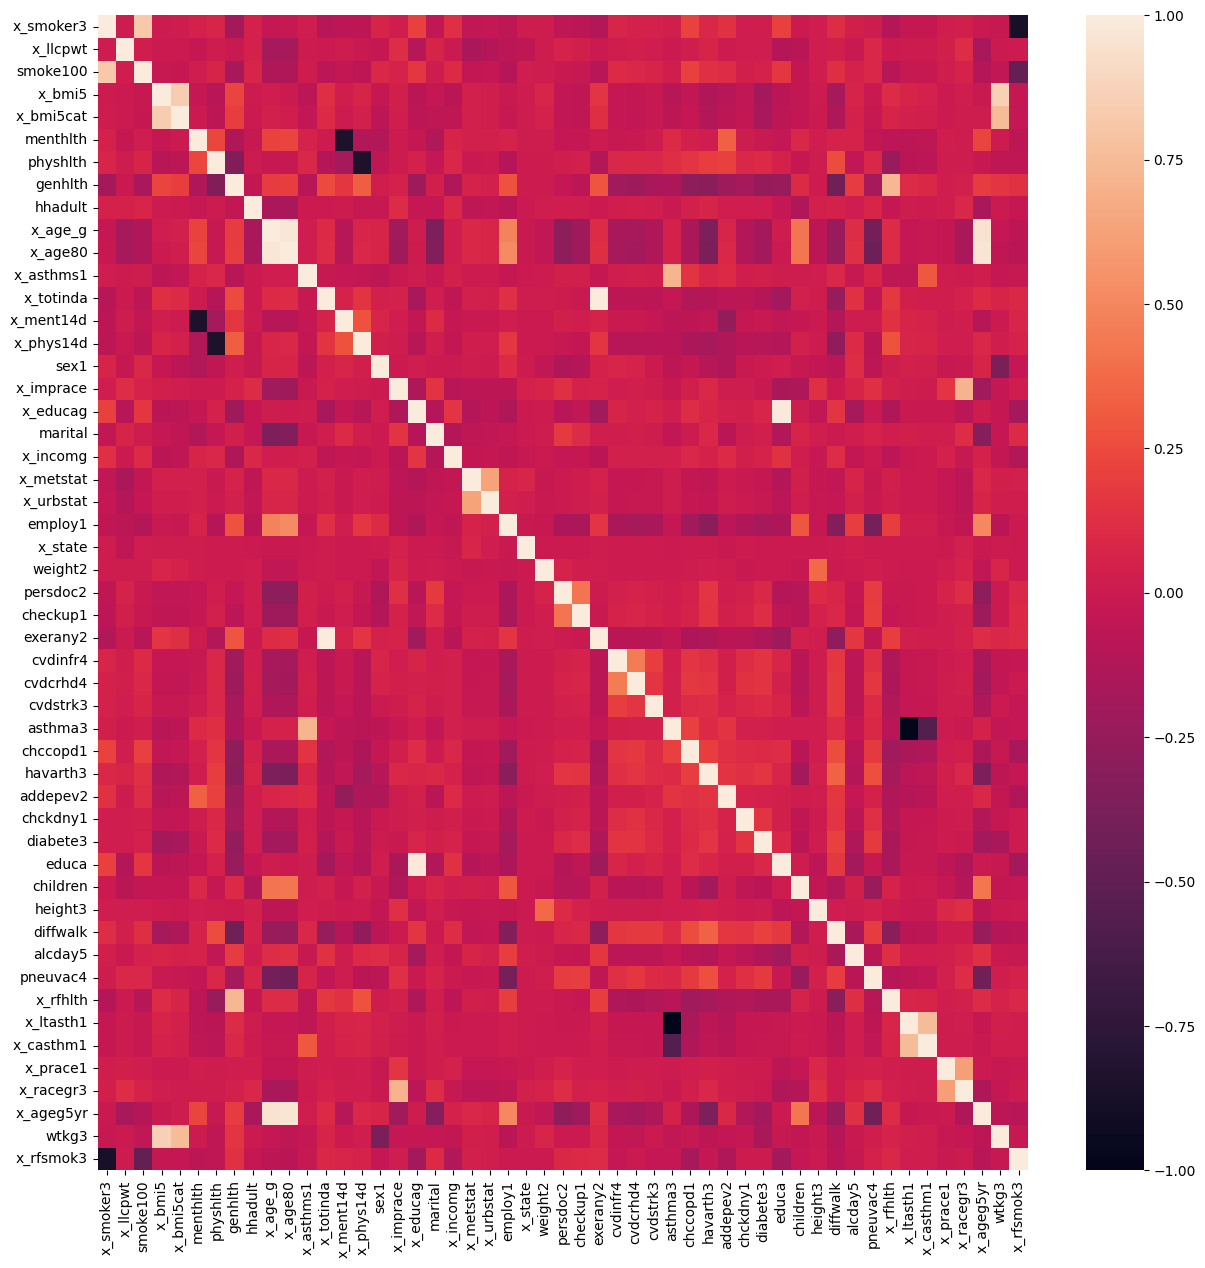

In [11]:
correlation = df[res_na.index].corr()

plt.figure(figsize=(15,15))
sns.heatmap(df[res_na.index].corr())
plt.show()


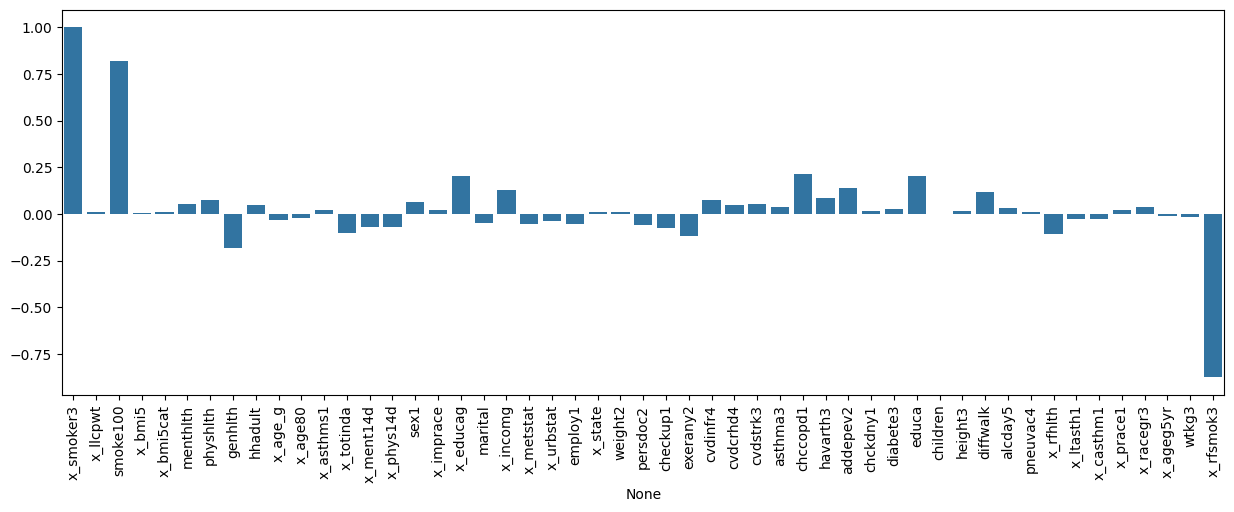

In [12]:
plt.figure(figsize=(15,5))
sns.barplot(y=correlation.x_smoker3.values, x=correlation.x_smoker3.index)
plt.xticks(rotation=90)
plt.show()


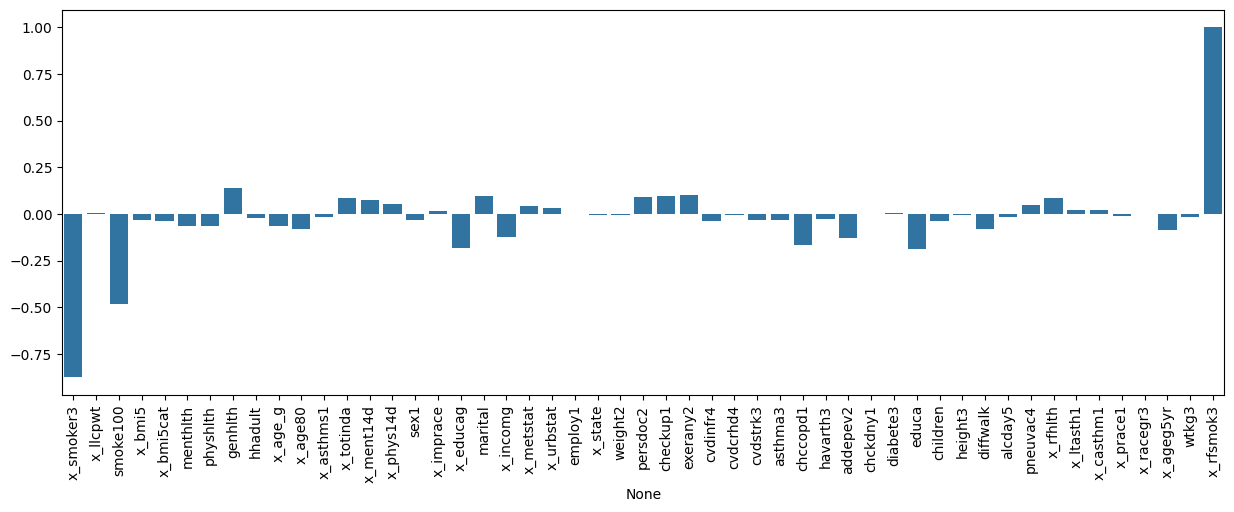

In [13]:
plt.figure(figsize=(15,5))
sns.barplot(y=correlation.x_rfsmok3.values, x=correlation.x_rfsmok3.index)
plt.xticks(rotation=90)
plt.show()


In [14]:
# from res_na

numerical_features = [
    'x_llcpwt','x_age80','x_bmi5','weight2','wtkg3','height3',
    'children','hhadult','alcday5','menthlth','physhlth','poorhlth'
]

categorical_features = [
    'smoke100','x_bmi5cat','genhlth','x_age_g','x_asthms1','x_ltasth1','x_casthm1',
    'x_totinda','exerany2','x_ment14d','x_phys14d','sex1','x_imprace','x_prace1','x_racegr3',
    'x_educag','educa','marital','x_incomg','x_metstat','x_urbstat','employ1','x_state',
    'persdoc2','checkup1','cvdinfr4','cvdcrhd4','cvdstrk3','asthma3','chccopd1','havarth3','addepev2',
    'chckdny1','diabete3','diffwalk','pneuvac4','x_rfhlth','x_rfsmok3','x_ageg5yr'
]

len(numerical_features+categorical_features)


51

In [15]:
categorical_features.remove("smoke100")
categorical_features.remove("x_rfsmok3")
numerical_features.remove("x_llcpwt")

len(numerical_features+categorical_features)


48

In [16]:
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),                # پر کردن مقادیر گمشده عددی با میانگین
    ('scaler', StandardScaler())                                # مقیاس‌بندی ویژگی‌های عددی
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),       # پر کردن مقادیر گمشده متنی/منطقی با مد (پرتکرارترین)
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ],
    remainder='passthrough'
)


In [17]:
df2018_without_4_smoker3 = df.copy()

df2018_without_4_smoker3['x_smoker3'].replace(4, np.nan, inplace=True)

df2018_without_4_smoker3.dropna(subset=['x_smoker3'], inplace=True)

df2018_without_4_smoker3['x_smoker3'] = df2018_without_4_smoker3['x_smoker3'].astype(int)
mapping_dict = {
    1: 0,
    2: 0,
    3: 1
}
df2018_without_4_smoker3['x_smoker3'] = df2018_without_4_smoker3['x_smoker3'].map(mapping_dict)

df2018_without_4_smoker3['x_smoker3'].value_counts()


,count
x_smoker3,
1,103835
0,52488


In [18]:
X = df2018_without_4_smoker3[numerical_features+categorical_features]
y = df2018_without_4_smoker3["x_smoker3"]


In [19]:
scale_pos_weight = y.value_counts()[0] / y.value_counts()[1]
scale_pos_weight


np.float64(0.5054942938315596)

In [20]:
X_processed = preprocessor.fit_transform(X)
print(f"\nShape of data after preprocessing: {X_processed.shape}")

feature_names_processed = preprocessor.get_feature_names_out()
print(f"Number of features after preprocessing: {len(feature_names_processed)}")

feature_names_processed



Shape of data after preprocessing: (156323, 48)
Number of features after preprocessing: 48


array(['num__x_age80', 'num__x_bmi5', 'num__weight2', 'num__wtkg3',
       'num__height3', 'num__children', 'num__hhadult', 'num__alcday5',
       'num__menthlth', 'num__physhlth', 'num__poorhlth',
       'cat__x_bmi5cat', 'cat__genhlth', 'cat__x_age_g', 'cat__x_asthms1',
       'cat__x_ltasth1', 'cat__x_casthm1', 'cat__x_totinda',
       'cat__exerany2', 'cat__x_ment14d', 'cat__x_phys14d', 'cat__sex1',
       'cat__x_imprace', 'cat__x_prace1', 'cat__x_racegr3',
       'cat__x_educag', 'cat__educa', 'cat__marital', 'cat__x_incomg',
       'cat__x_metstat', 'cat__x_urbstat', 'cat__employ1', 'cat__x_state',
       'cat__persdoc2', 'cat__checkup1', 'cat__cvdinfr4', 'cat__cvdcrhd4',
       'cat__cvdstrk3', 'cat__asthma3', 'cat__chccopd1', 'cat__havarth3',
       'cat__addepev2', 'cat__chckdny1', 'cat__diabete3', 'cat__diffwalk',
       'cat__pneuvac4', 'cat__x_rfhlth', 'cat__x_ageg5yr'], dtype=object)

In [21]:
X_processed_df = pd.DataFrame(X_processed, columns=numerical_features+categorical_features)


In [ ]:
# weights = df2018["x_llcpwt"]


In [22]:
weights = df2018_without_4_smoker3["x_llcpwt"]


## Feature Engineering

In [23]:
# Define the full pipeline for preprocessing + feature selection
k=30
feature_selection_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('selector', SelectKBest(score_func=f_classif, k=k))       # Select top K best features
])

feature_selection_pipeline.fit(X, y)

# Get the scores for each feature
feature_scores = feature_selection_pipeline.named_steps['selector'].scores_

numerical_feature_names = numerical_features
# Get one-hot encoded feature names
onehot_features = feature_selection_pipeline.named_steps['preprocessor'].named_transformers_['cat']
categorical_feature_names_onehot = onehot_features.get_feature_names_out(categorical_features)

# Combine all processed feature names
all_processed_feature_names = list(numerical_feature_names) + list(categorical_feature_names_onehot)

feature_scores_series = pd.Series(feature_scores, index=all_processed_feature_names)
sorted_features = feature_scores_series.sort_values(ascending=False)
selected_features_names = sorted_features.head(feature_selection_pipeline.named_steps['selector'].k).index.tolist()

print(f"Method used for Feature Selection: SelectKBest with f_classif (selecting top {feature_selection_pipeline.named_steps['selector'].k} features)")
print("\nTop features based on f_classif score:")
print(sorted_features.head(30))

print(f"\nSelected {feature_selection_pipeline.named_steps['selector'].k} Features:")
print(selected_features_names)


Method used for Feature Selection: SelectKBest with f_classif (selecting top 30 features)

Top features based on f_classif score:
x_age80      12676.758791
x_ageg5yr    12590.880725
x_age_g      10599.685632
educa         6165.529527
x_educag      5975.523497
marital       5589.666278
persdoc2      3657.875799
checkup1      3435.046619
pneuvac4      3405.523994
x_incomg      2962.383613
addepev2      2413.608005
children      1868.017852
genhlth       1579.123858
menthlth      1572.946029
exerany2      1444.700730
x_ment14d     1337.106058
employ1       1263.025945
chccopd1      1244.422564
x_totinda     1132.169476
x_imprace     1117.352754
x_bmi5cat     1064.681752
wtkg3          807.507823
x_bmi5         724.287430
x_rfhlth       641.409289
x_racegr3      485.946475
havarth3       476.676856
physhlth       447.318729
cvdcrhd4       407.935498
diabete3       379.287497
poorhlth       350.066223
dtype: float64

Selected 30 Features:
['x_age80', 'x_ageg5yr', 'x_age_g', 'educa', 'x_educ

Method 2: Recursive Feature Elimination (RFE)

In [24]:
# Initialize RFE. Select a base estimator and specify the number of features to select.
rfe_selector = RFE(estimator=LogisticRegression(random_state=42, max_iter=200), n_features_to_select=7)

# Fit RFE on the processed data (X_processed) and the target (y)
rfe_selector.fit(X_processed, y)

# Get the boolean mask of selected features and their ranking
selected_features_mask_rfe = rfe_selector.support_
feature_ranking_rfe = rfe_selector.ranking_

# Get the names of the selected features based on the mask
selected_features_names_rfe = feature_names_processed[selected_features_mask_rfe].tolist()

print("Selected features by RFE:")
print(selected_features_names_rfe)


Selected features by RFE:
['num__x_age80', 'num__x_bmi5', 'cat__x_age_g', 'cat__exerany2', 'cat__educa', 'cat__chccopd1', 'cat__addepev2']


In [ ]:
# rfe_selector_rf = RFE(estimator=RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=15)
# rfe_selector_rf.fit(X_processed, y.values.ravel())
# selected_features_mask_rfe_rf = rfe_selector_rf.support_
# selected_features_names_rfe_rf = feature_names_processed[selected_features_mask_rfe_rf].tolist()
# print("\nSelected features by RFE with RandomForestClassifier:")
# print(selected_features_names_rfe_rf)


Method 3: Feature Importance from RandomForestClassifier

In [25]:
rf_model_for_importance = RandomForestClassifier(n_estimators=200, random_state=42)

# Fit the model on the processed data (X_processed) and the target (y)
rf_model_for_importance.fit(X_processed, y, sample_weight=weights)

# Get the feature importances from the fitted model
feature_importances_rf = rf_model_for_importance.feature_importances_

feature_importances_series_rf = pd.Series(feature_importances_rf, index=feature_names_processed)
sorted_feature_importances_rf = feature_importances_series_rf.sort_values(ascending=False)

print("Top features based on RandomForest feature importance:")
print(sorted_feature_importances_rf.head(20))

top_k_features_names_rf = sorted_feature_importances_rf.head(20).index.tolist()

print(f"\nTop 20 feature names selected by RandomForest importance:")
print(top_k_features_names_rf)


Top features based on RandomForest feature importance:
num__x_age80      0.071081
num__x_bmi5       0.067702
cat__x_state      0.057433
num__weight2      0.052320
num__wtkg3        0.051790
cat__x_ageg5yr    0.047929
num__height3      0.045602
cat__x_incomg     0.038823
num__alcday5      0.038013
cat__marital      0.036008
num__hhadult      0.027967
cat__x_age_g      0.027421
cat__educa        0.025805
cat__x_educag     0.025435
cat__employ1      0.024623
cat__genhlth      0.024525
num__menthlth     0.024368
num__poorhlth     0.023114
num__physhlth     0.019845
cat__checkup1     0.019399
dtype: float64

Top 20 feature names selected by RandomForest importance:
['num__x_age80', 'num__x_bmi5', 'cat__x_state', 'num__weight2', 'num__wtkg3', 'cat__x_ageg5yr', 'num__height3', 'cat__x_incomg', 'num__alcday5', 'cat__marital', 'num__hhadult', 'cat__x_age_g', 'cat__educa', 'cat__x_educag', 'cat__employ1', 'cat__genhlth', 'num__menthlth', 'num__poorhlth', 'num__physhlth', 'cat__checkup1']


In [26]:
sorted_feature_importances_rf


,0
num__x_age80,0.071081
num__x_bmi5,0.067702
cat__x_state,0.057433
num__weight2,0.052320
num__wtkg3,0.051790
cat__x_ageg5yr,0.047929
num__height3,0.045602
cat__x_incomg,0.038823
num__alcday5,0.038013
cat__marital,0.036008


Variance Threshold

In [27]:
selector_vt = VarianceThreshold(threshold=0.5)

selected_features_mask_vt = selector_vt.fit(X_processed).get_support()
selected_features_names_vt = feature_names_processed[selected_features_mask_vt].tolist()

print(f"تعداد ویژگی‌های انتخاب شده توسط Variance Threshold: {len(selected_features_names_vt)}")
print("ویژگی‌های انتخاب شده:")
print(selected_features_names_vt)


تعداد ویژگی‌های انتخاب شده توسط Variance Threshold: 31
ویژگی‌های انتخاب شده:
['num__x_age80', 'num__x_bmi5', 'num__weight2', 'num__wtkg3', 'num__height3', 'num__children', 'num__hhadult', 'num__alcday5', 'num__menthlth', 'num__physhlth', 'num__poorhlth', 'cat__x_bmi5cat', 'cat__genhlth', 'cat__x_age_g', 'cat__x_asthms1', 'cat__x_casthm1', 'cat__x_ment14d', 'cat__x_phys14d', 'cat__x_imprace', 'cat__x_prace1', 'cat__x_racegr3', 'cat__x_educag', 'cat__educa', 'cat__marital', 'cat__x_incomg', 'cat__employ1', 'cat__x_state', 'cat__persdoc2', 'cat__checkup1', 'cat__diabete3', 'cat__x_ageg5yr']


۲. Correlation Matrix (ماتریس همبستگی)
این روش برای کاهش همخطی چندگانه (Multicollinearity) استفاده می‌شود. ویژگی‌هایی که همبستگی بسیار بالایی با یکدیگر دارند را شناسایی و یکی از آن‌ها را حذف می‌کند. این کار به پایداری و تفسیرپذیری مدل‌های خطی کمک می‌کند.

In [28]:
# محاسبه ماتریس همبستگی. abs() برای در نظر گرفتن همبستگی مثبت و منفی.
corr_matrix = X_processed_df.corr().abs()

# انتخاب مثلث بالایی ماتریس همبستگی برای جلوگیری از تکرار و مقادیر روی قطر اصلی
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# 0.9 یک آستانه رایج است، می‌توانید آن را تغییر دهید.
to_drop_high_corr = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]

# ویژگی‌های باقی‌مانده (انتخاب‌شده)
selected_features_names_corr = [col for col in feature_names_processed if col not in to_drop_high_corr]

print(f"ویژگی‌های حذف شده به دلیل همبستگی بالا (>0.9): {to_drop_high_corr}")
print(f"تعداد ویژگی‌های انتخاب شده بعد از حذف همبستگی بالا: {len(selected_features_names_corr)}")
print("ویژگی‌های انتخاب شده:")
print(selected_features_names_corr)


ویژگی‌های حذف شده به دلیل همبستگی بالا (>0.9): ['x_age_g', 'educa', 'x_ageg5yr']
تعداد ویژگی‌های انتخاب شده بعد از حذف همبستگی بالا: 48
ویژگی‌های انتخاب شده:
['num__x_age80', 'num__x_bmi5', 'num__weight2', 'num__wtkg3', 'num__height3', 'num__children', 'num__hhadult', 'num__alcday5', 'num__menthlth', 'num__physhlth', 'num__poorhlth', 'cat__x_bmi5cat', 'cat__genhlth', 'cat__x_age_g', 'cat__x_asthms1', 'cat__x_ltasth1', 'cat__x_casthm1', 'cat__x_totinda', 'cat__exerany2', 'cat__x_ment14d', 'cat__x_phys14d', 'cat__sex1', 'cat__x_imprace', 'cat__x_prace1', 'cat__x_racegr3', 'cat__x_educag', 'cat__educa', 'cat__marital', 'cat__x_incomg', 'cat__x_metstat', 'cat__x_urbstat', 'cat__employ1', 'cat__x_state', 'cat__persdoc2', 'cat__checkup1', 'cat__cvdinfr4', 'cat__cvdcrhd4', 'cat__cvdstrk3', 'cat__asthma3', 'cat__chccopd1', 'cat__havarth3', 'cat__addepev2', 'cat__chckdny1', 'cat__diabete3', 'cat__diffwalk', 'cat__pneuvac4', 'cat__x_rfhlth', 'cat__x_ageg5yr']


### VIF Method

In [ ]:
# def calculate_vif(df_features):
#     variables = df_features.copy()
#     threshold = 5.0

#     while True:
#         vif_df = pd.DataFrame()
#         vif_df["Feature"] = variables.columns

#         vif_df["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
#         max_vif = vif_df["VIF"].max()

#         if max_vif > threshold:
#             feature_with_max_vif = vif_df.sort_values(by="VIF", ascending=False).iloc[0]["Feature"]
#             print(f"remove feature'{feature_with_max_vif}' with VIF = {max_vif:.2f}")

#             variables = variables.drop(columns=[feature_with_max_vif])
#         else:
#             print(f"can't find any feature with vif bigger than {threshold}")
#             break

#     print("\n End of vif removing features process")
#     print(vif_df.sort_values(by="VIF", ascending=False))
#     return variables.columns.tolist()

# selected_features_vif = calculate_vif(X_processed_df)
# print(f"\nselected features with VIF method:")
# print(selected_features_vif)
# X_vif_selected = X_processed_df[selected_features_vif]


KeyboardInterrupt: 

In [29]:
vif_less_than_7 = ['x_age80', 'x_bmi5', 'weight2', 'wtkg3', 'height3', 'children', 'hhadult', 'alcday5', 'menthlth', 'physhlth', 'poorhlth', 'x_casthm1', 'x_totinda', 'x_ment14d', 'x_phys14d', 'x_imprace', 'x_prace1', 'marital', 'x_incomg', 'employ1', 'x_state', 'persdoc2', 'checkup1', 'x_rfhlth']
X_processed_df_vif = X_processed_df[vif_less_than_7]
X_processed_df_vif.shape


(156323, 24)

In [30]:
numerical_features_selected = [f for f in vif_less_than_7 if f in numerical_features]
categorical_features_selected = [f for f in vif_less_than_7 if f in categorical_features]

preprocessor_vif = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features_selected),
        ('cat', categorical_pipeline, categorical_features_selected)
    ],
    remainder='passthrough'
)

X_vif = df2018_without_4_smoker3[vif_less_than_7]


مدل‌های مبتنی بر درخت مانند Random Forest، XGBoost و LightGBM به هم‌خطی (Multicollinearity) حساسیت بسیار کمی دارند.

#### منحنی Precision-Recall

برای داده‌های نامتوازن، این نمودار اغلب آموزنده‌تر از ROC است، چون بر عملکرد مدل روی کلاس اقلیت (در اینجا، سیگاری‌های سابق) تمرکز می‌کند.

Precision: از بین تمام کسانی که مدل گفته "ترک کرده‌اند"، چند درصدشان واقعاً ترک کرده بودند؟

Recall: از بین تمام کسانی که واقعاً ترک کرده‌اند، مدل توانسته چند درصدشان را شناسایی کند؟

#### منحنی AUC-ROC

این منحنی، نرخ True Positive Rate (Recall) را در مقابل نرخ False Positive Rate در آستانه‌های مختلف طبقه‌بندی رسم می‌کند.

عملکرد ایده‌آل: منحنی‌ای که به گوشه بالا-چپ نزدیک‌تر است.

مقدار AUC: سطح زیر این منحنی. عددی بین ۰.۵ (مدل تصادفی) و ۱.۰ (مدل کامل). هر چه به ۱ نزدیک‌تر باشد، بهتر است.

# White/Black box models on VIF/ALL features

In [31]:
def run_full_analysis(model_name, model_constructor_func, preprocessor_instance, X_data, y_data, weights_data):
    model_instance = model_constructor_func()

    # split data
    le = LabelEncoder()
    y_encoded = le.fit_transform(y_data)
    target_names_original = le.inverse_transform(np.unique(y_encoded)).astype(str)
    X_train, X_test, y_train, y_test, weights_train, weights_test = train_test_split(
        X_data, y_encoded, weights_data, test_size=0.2, random_state=42, stratify=y_encoded
    )

    # pipline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor_instance),
        ('classifier', model_instance)
    ])

    print(f"\n===== Training model: {model_name} =====")
    start_time = time.time()
    if isinstance(model_instance, LDA):
        print("Model is LDA, fitting without sample_weight.")
        pipeline.fit(X_train, y_train)
    else:
        # other model train with weights
        pipeline.fit(X_train, y_train, classifier__sample_weight=weights_train)
    training_time = time.time() - start_time


    # evaluate
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    auc = roc_auc_score(y_test, y_proba)

    print(f"Training completed in {training_time:.2f} seconds.")
    print(f"Accuracy: {accuracy:.4f} | F1-Score: {f1:.4f} | AUC: {auc:.4f}")


    # Evaluation plots
    fig, axes = plt.subplots(1, 3, figsize=(21, 5))
    fig.suptitle(f"Evaluation for {model_name}", fontsize=16)
    ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test, ax=axes[0], cmap=plt.cm.Blues)
    RocCurveDisplay.from_estimator(pipeline, X_test, y_test, ax=axes[1])
    PrecisionRecallDisplay.from_estimator(pipeline, X_test, y_test, ax=axes[2])
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


    # analysis for each model
    fitted_preprocessor = pipeline.named_steps['preprocessor']
    final_model = pipeline.named_steps['classifier']
    feature_names = fitted_preprocessor.get_feature_names_out()

    if isinstance(final_model, (LogisticRegression, LDA)):
        print("\n--- Coefficient Analysis ---")
        coefficients = final_model.coef_[0]
        feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
        if isinstance(final_model, LogisticRegression):
            feature_importance['Odds_Ratio'] = np.exp(coefficients)

        # sort by abs of coeff
        feature_importance['Abs_Coefficient'] = np.abs(feature_importance['Coefficient'])
        print(feature_importance.sort_values(by='Abs_Coefficient', ascending=False).drop(columns='Abs_Coefficient'))

    elif isinstance(final_model, DecisionTreeClassifier):
        print("\n--- Decision Tree Analysis ---")
        plt.figure(figsize=(40, 20))
        plot_tree(final_model, feature_names=feature_names, class_names=target_names_original,
                  filled=True, rounded=True, fontsize=7, max_depth=5)
        plt.title(f"Decision Tree for {model_name}")
        plt.show()

        # show tree conditions in text
        tree_rules = export_text(final_model, feature_names=list(feature_names))
        print("Tree Rules (first few levels):\n", "\n".join(tree_rules.splitlines()[:20]))

    elif isinstance(final_model, (xgb.XGBClassifier, lgb.LGBMClassifier, cb.CatBoostClassifier)):
        print(f"\n--- SHAP Analysis for {model_name} ---")
        X_test_transformed = fitted_preprocessor.transform(X_test)
        X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=feature_names)
        explainer = shap.TreeExplainer(final_model)
        shap_values = explainer.shap_values(X_test_transformed_df)

        shap.summary_plot(shap_values, X_test_transformed_df, show=False)
        plt.title(f'SHAP Summary Plot - {model_name}')
        plt.show()

    return {'Model': model_name, 'Accuracy': accuracy, 'F1-Score': f1, 'AUC': auc, 'Time (s)': training_time}

# models
models_to_run_full_suite = {
    # Boosting Models
    'XGBoost': lambda: xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', scale_pos_weight=scale_pos_weight, random_state=42),
    'LightGBM': lambda: lgb.LGBMClassifier(objective='binary', scale_pos_weight=scale_pos_weight, random_state=42),
    'CatBoost': lambda: cb.CatBoostClassifier(scale_pos_weight=scale_pos_weight, random_state=42, verbose=0),

    # Classic & Interpretable Models
    'Logistic Regression': lambda: LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': lambda: DecisionTreeClassifier(max_depth=7, random_state=42, min_samples_split=20, min_samples_leaf=10),
    'LDA': lambda: LDA()
}

# store results
vif_results = []
all_features_results = []



Analysis with VIF Selected Features

===== Training model: XGBoost (VIF) =====
Training completed in 3.23 seconds.
Accuracy: 0.6883 | F1-Score: 0.6953 | AUC: 0.7491


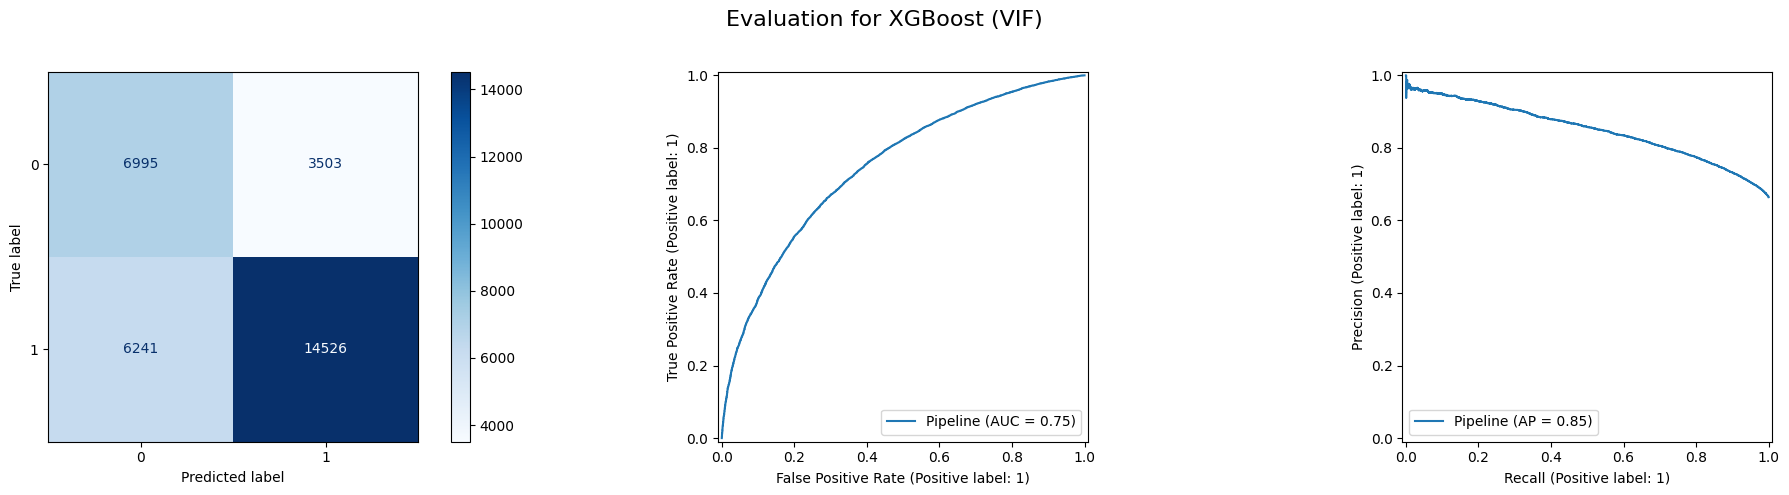


--- SHAP Analysis for XGBoost (VIF) ---


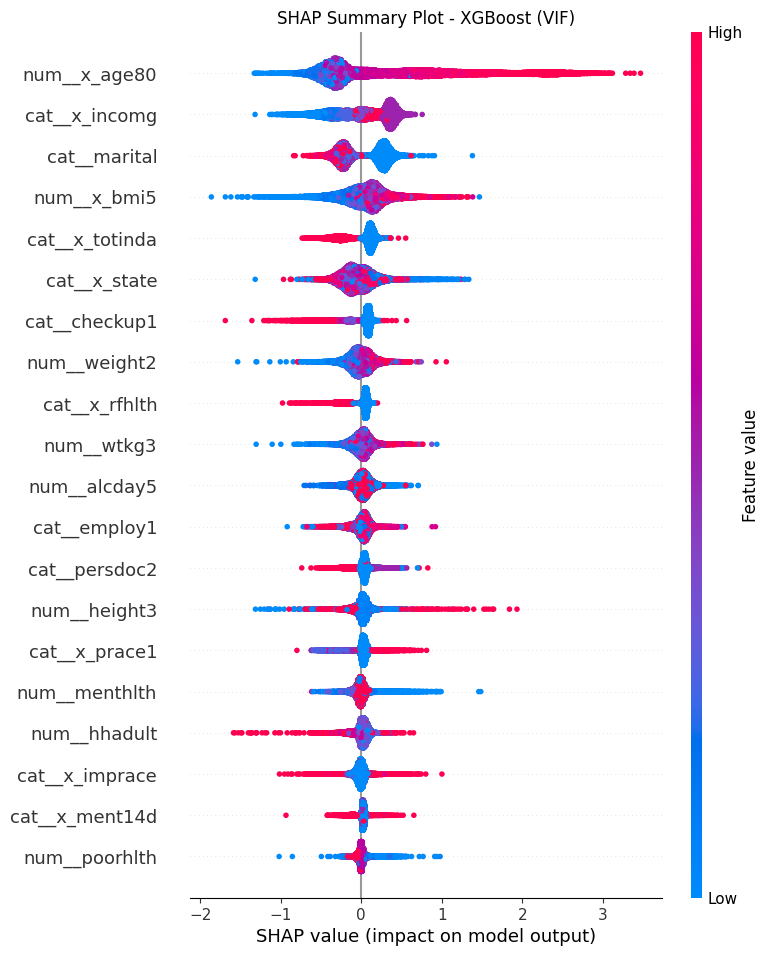


===== Training model: LightGBM (VIF) =====
[LightGBM] [Info] Number of positive: 83068, number of negative: 41990
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027062 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1212
[LightGBM] [Info] Number of data points in the train set: 125058, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.627815 -> initscore=0.522855
[LightGBM] [Info] Start training from score 0.522855
Training completed in 2.35 seconds.
Accuracy: 0.6873 | F1-Score: 0.6954 | AUC: 0.7624


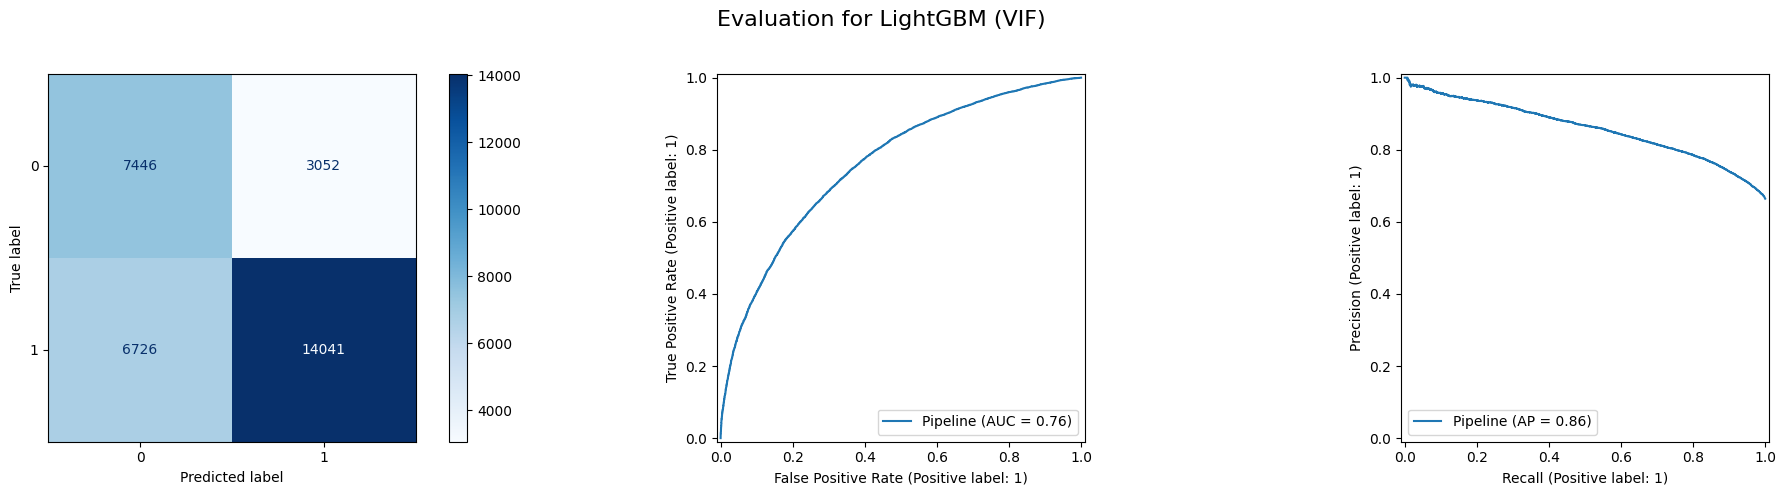


--- SHAP Analysis for LightGBM (VIF) ---


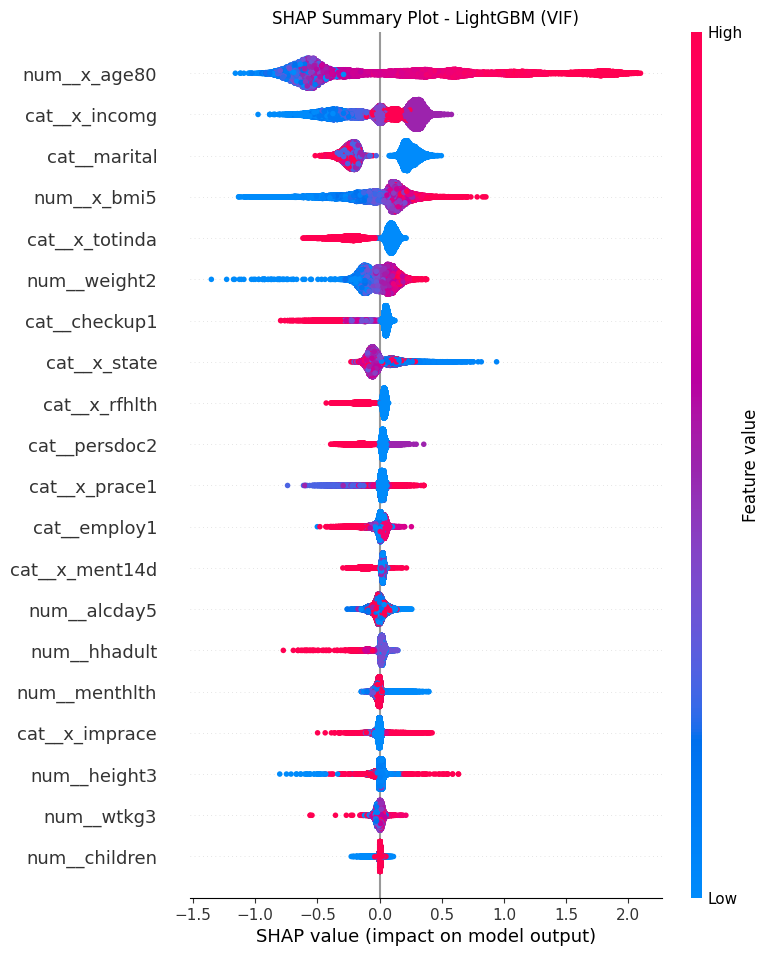


===== Training model: CatBoost (VIF) =====
Training completed in 39.70 seconds.
Accuracy: 0.6934 | F1-Score: 0.7006 | AUC: 0.7608


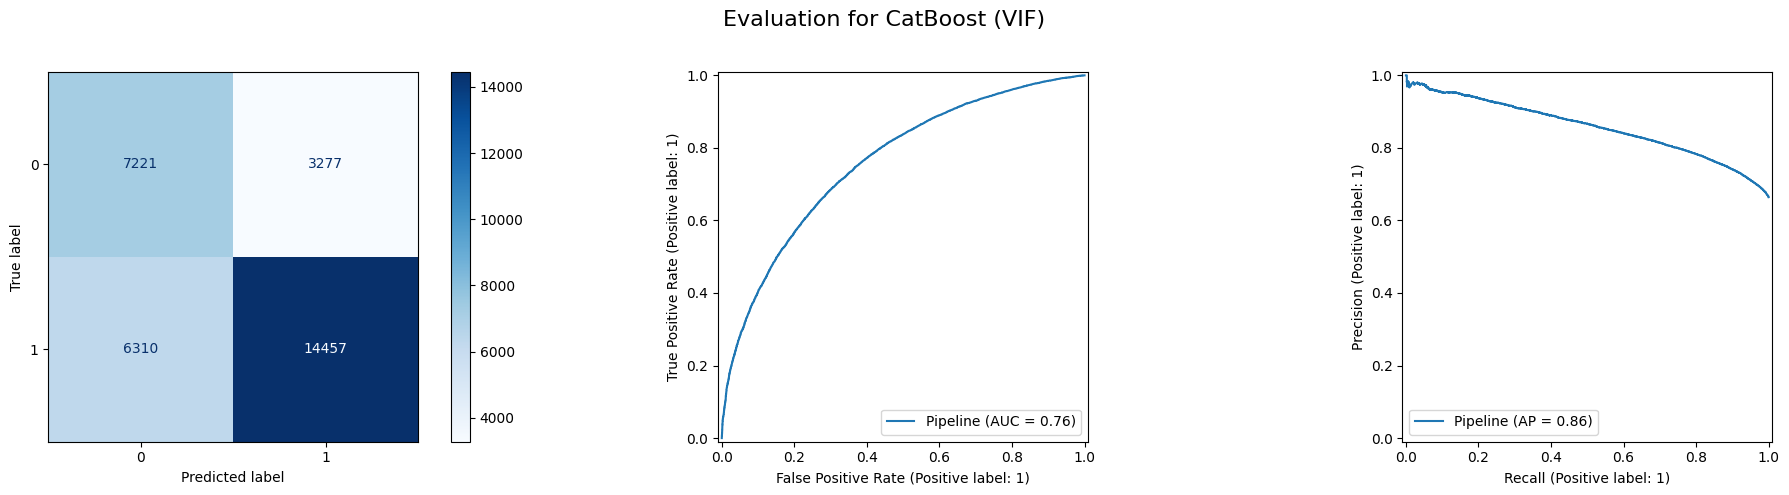


--- SHAP Analysis for CatBoost (VIF) ---


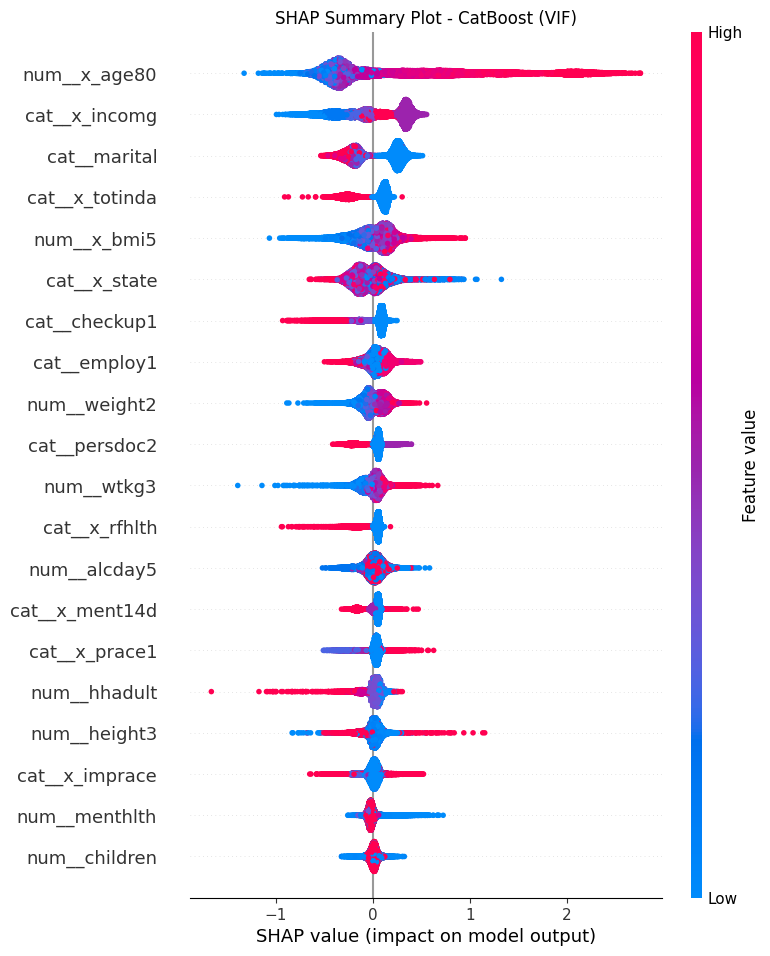


===== Training model: Logistic Regression (VIF) =====
Training completed in 6.40 seconds.
Accuracy: 0.6984 | F1-Score: 0.6610 | AUC: 0.7237


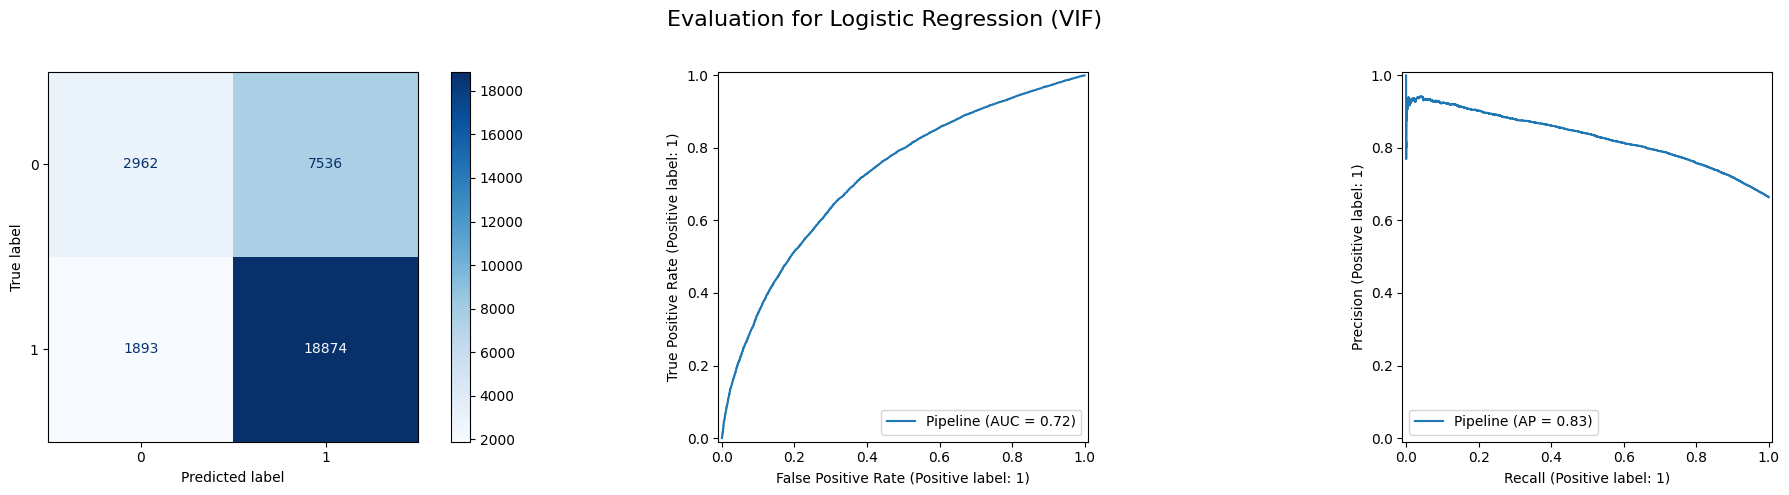


--- Coefficient Analysis ---
           Feature  Coefficient  Odds_Ratio
0     num__x_age80     0.450970    1.569835
12  cat__x_totinda    -0.316080    0.729001
23   cat__x_rfhlth    -0.224315    0.799064
22   cat__checkup1    -0.126699    0.880999
17    cat__marital    -0.116671    0.889878
3       num__wtkg3     0.115944    1.122933
18   cat__x_incomg     0.086896    1.090783
21   cat__persdoc2    -0.073013    0.929589
1      num__x_bmi5     0.055198    1.056750
6     num__hhadult    -0.044266    0.956699
9    num__physhlth     0.040332    1.041157
13  cat__x_ment14d    -0.036436    0.964220
7     num__alcday5    -0.033089    0.967453
4     num__height3     0.018516    1.018688
10   num__poorhlth     0.014863    1.014974
11  cat__x_casthm1     0.013687    1.013781
8    num__menthlth    -0.013097    0.986988
19    cat__employ1    -0.012764    0.987317
14  cat__x_phys14d    -0.012237    0.987837
5    num__children     0.010234    1.010287
15  cat__x_imprace     0.009776    1.009824
2 

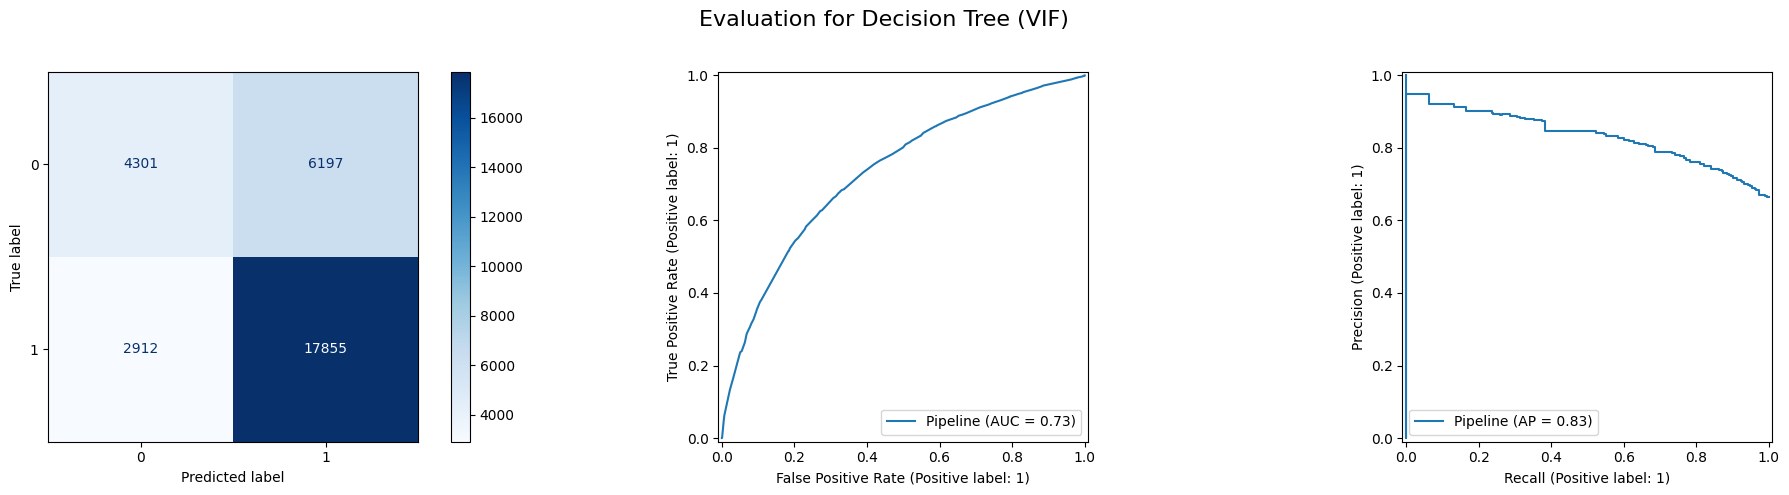


--- Decision Tree Analysis ---


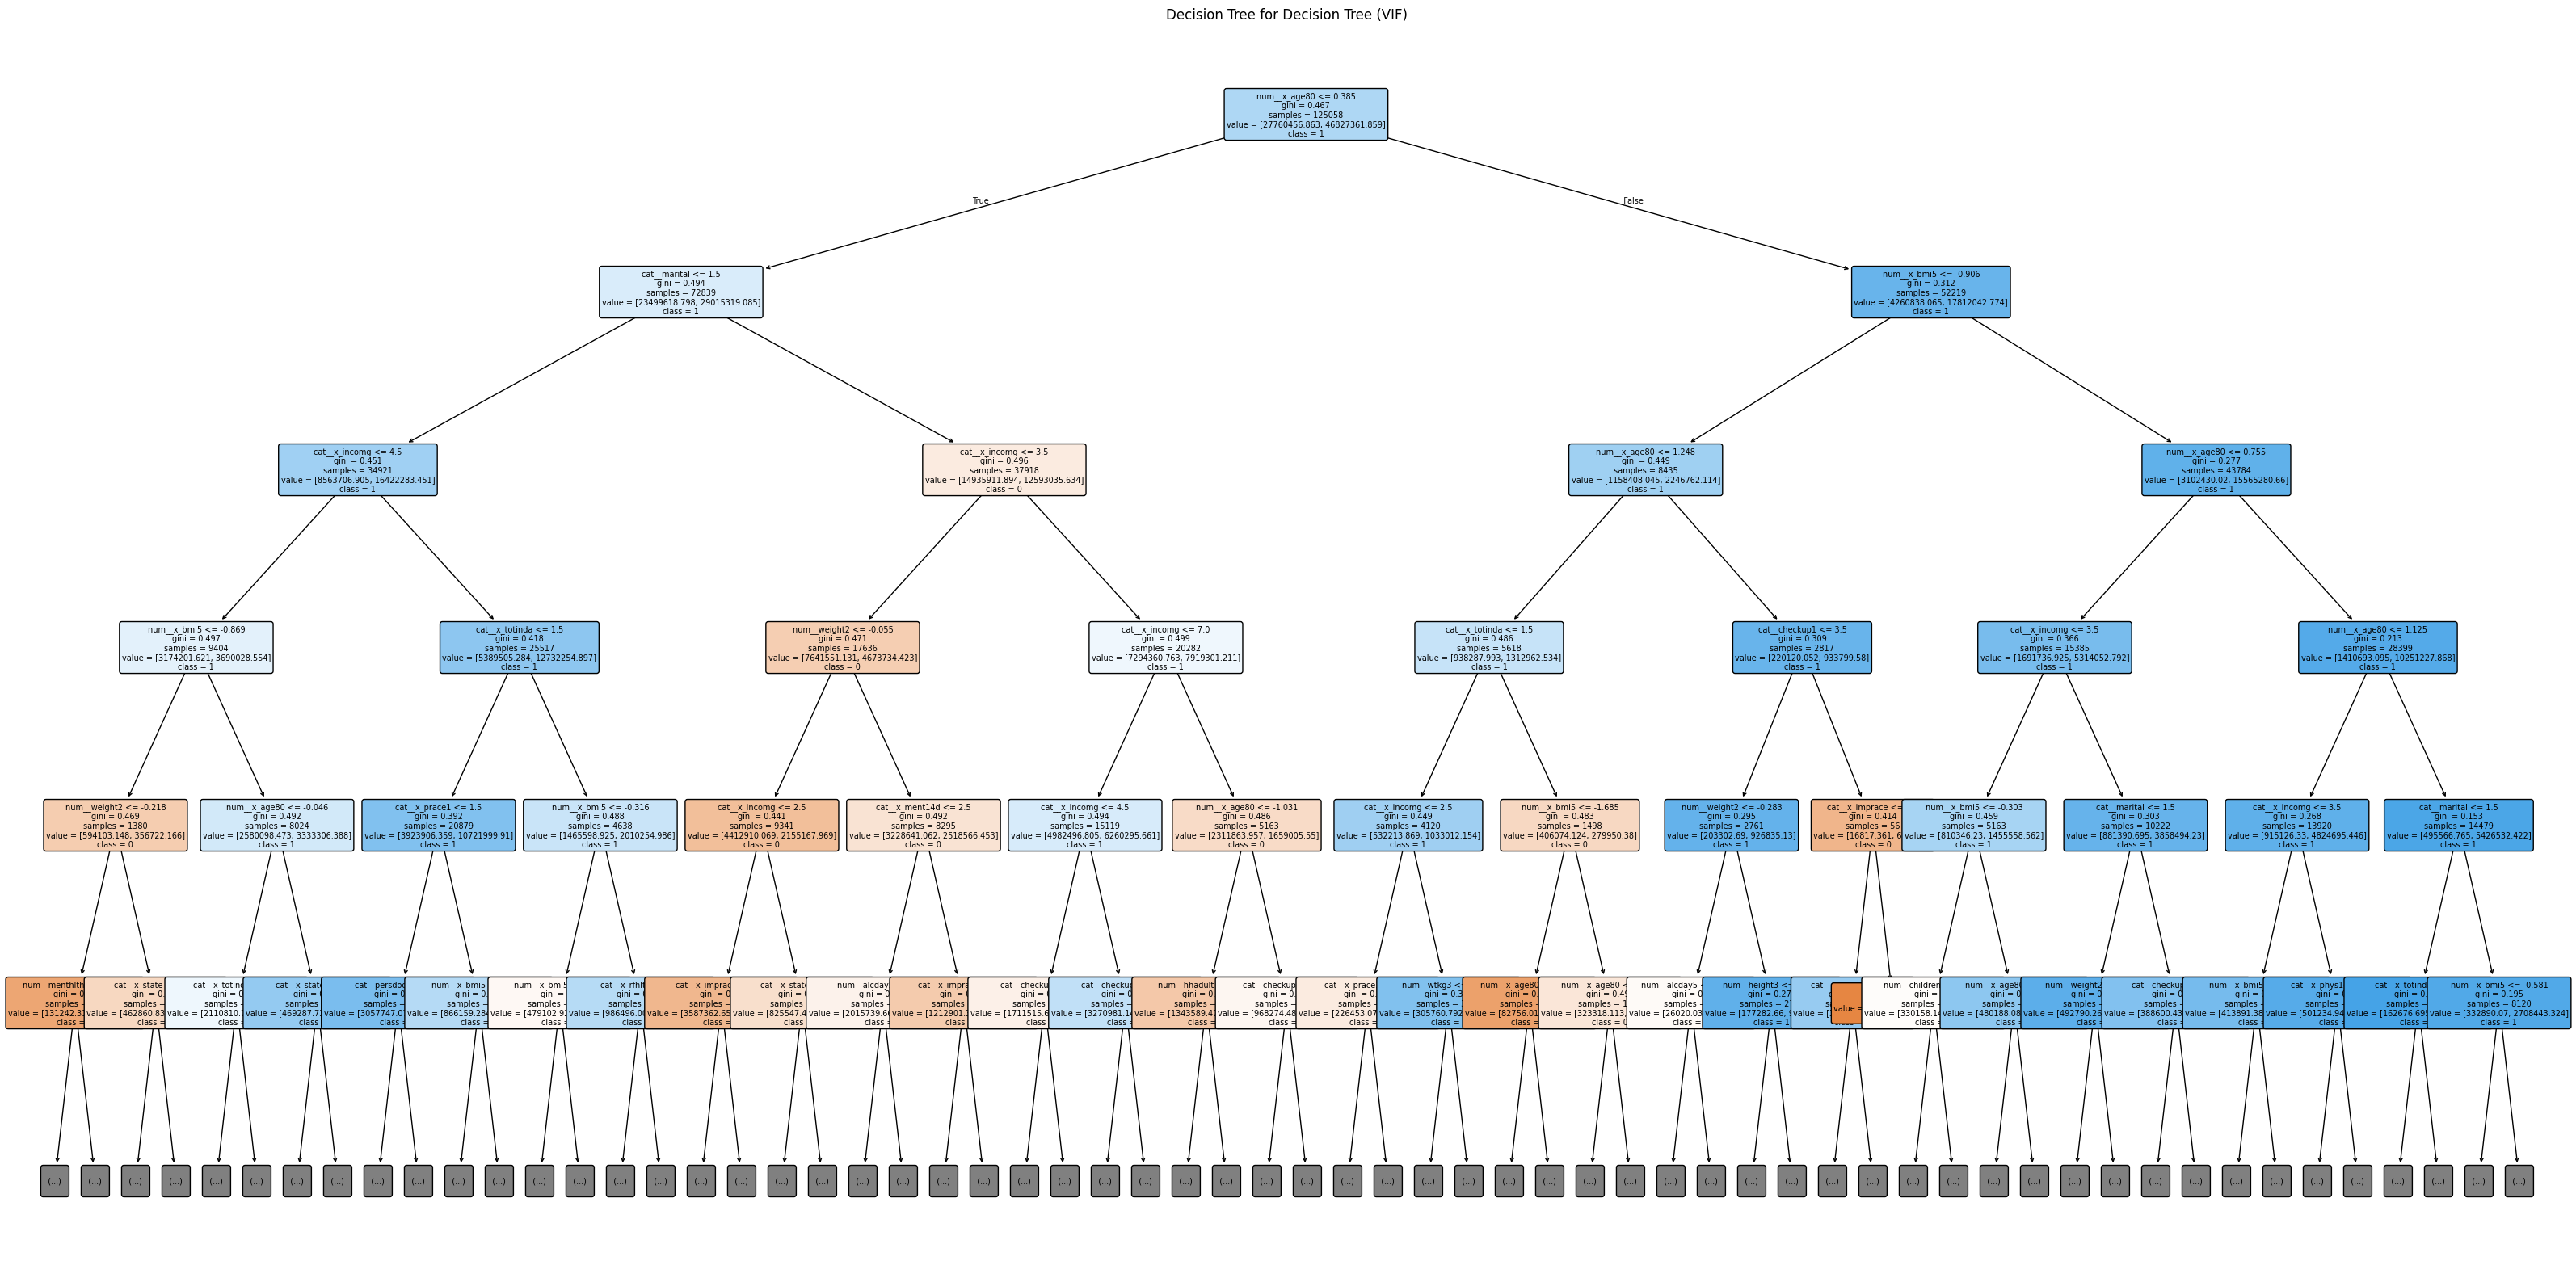

Tree Rules (first few levels):
 |--- num__x_age80 <= 0.39
|   |--- cat__marital <= 1.50
|   |   |--- cat__x_incomg <= 4.50
|   |   |   |--- num__x_bmi5 <= -0.87
|   |   |   |   |--- num__weight2 <= -0.22
|   |   |   |   |   |--- num__menthlth <= -1.33
|   |   |   |   |   |   |--- cat__x_state <= 36.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- cat__x_state >  36.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- num__menthlth >  -1.33
|   |   |   |   |   |   |--- num__x_bmi5 <= -1.86
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- num__x_bmi5 >  -1.86
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- num__weight2 >  -0.22
|   |   |   |   |   |--- cat__x_state <= 47.50
|   |   |   |   |   |   |--- num__height3 <= -0.09
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- num__height3 >  -0.09

===== Training model: LDA (VIF) =====
Model is LDA, fitting without sample_weight.
Training com

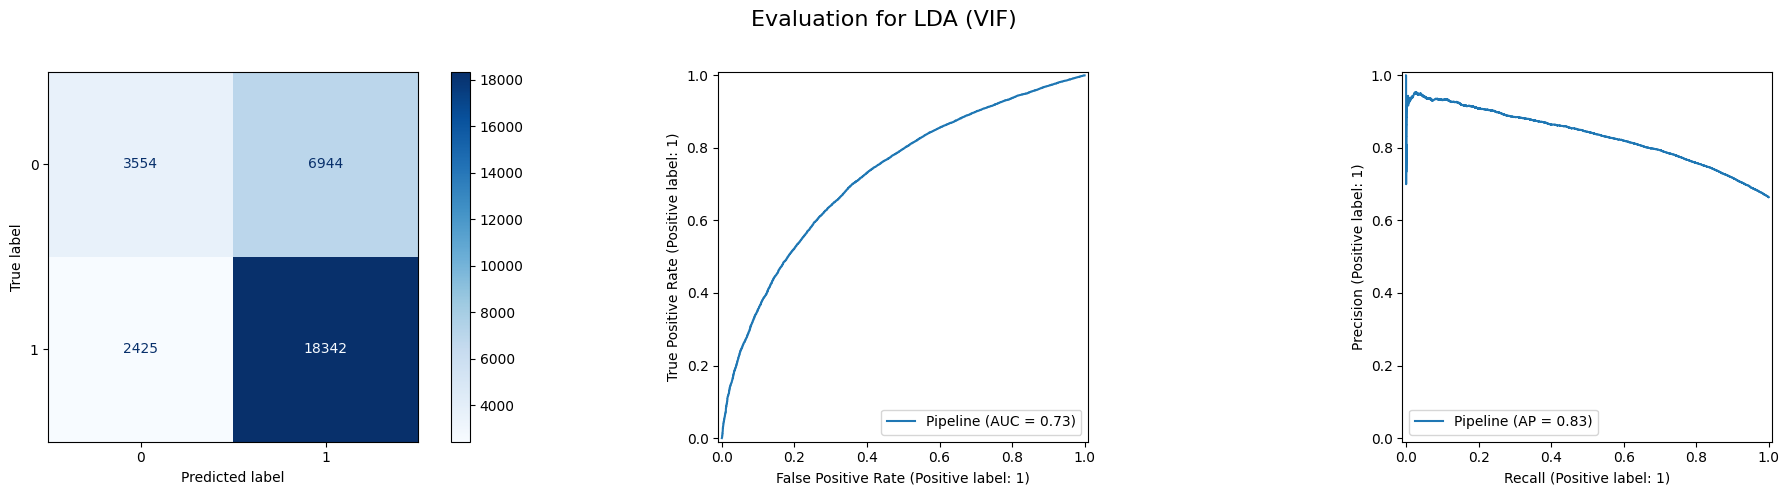


--- Coefficient Analysis ---
           Feature  Coefficient
0     num__x_age80     0.645559
12  cat__x_totinda    -0.394445
23   cat__x_rfhlth    -0.212866
3       num__wtkg3     0.165319
22   cat__checkup1    -0.156969
17    cat__marital    -0.115991
21   cat__persdoc2    -0.107181
1      num__x_bmi5     0.097727
18   cat__x_incomg     0.096857
7     num__alcday5    -0.065119
13  cat__x_ment14d    -0.054247
15  cat__x_imprace    -0.031165
9    num__physhlth     0.030220
4     num__height3     0.027726
19    cat__employ1    -0.026099
10   num__poorhlth     0.021660
6     num__hhadult    -0.021581
5    num__children    -0.020778
11  cat__x_casthm1    -0.017093
14  cat__x_phys14d    -0.014727
8    num__menthlth     0.003518
2     num__weight2     0.002405
16   cat__x_prace1     0.001583
20    cat__x_state    -0.000965


In [32]:
# vif features
print("\nAnalysis with VIF Selected Features")
for name, model_constructor in models_to_run_full_suite.items():
    result = run_full_analysis(f"{name} (VIF)", model_constructor, preprocessor_vif, X_vif, y, weights)
    vif_results.append(result)



Analysis with All Features

===== Training model: XGBoost (All Features) =====
Training completed in 4.28 seconds.
Accuracy: 0.7049 | F1-Score: 0.7113 | AUC: 0.7685


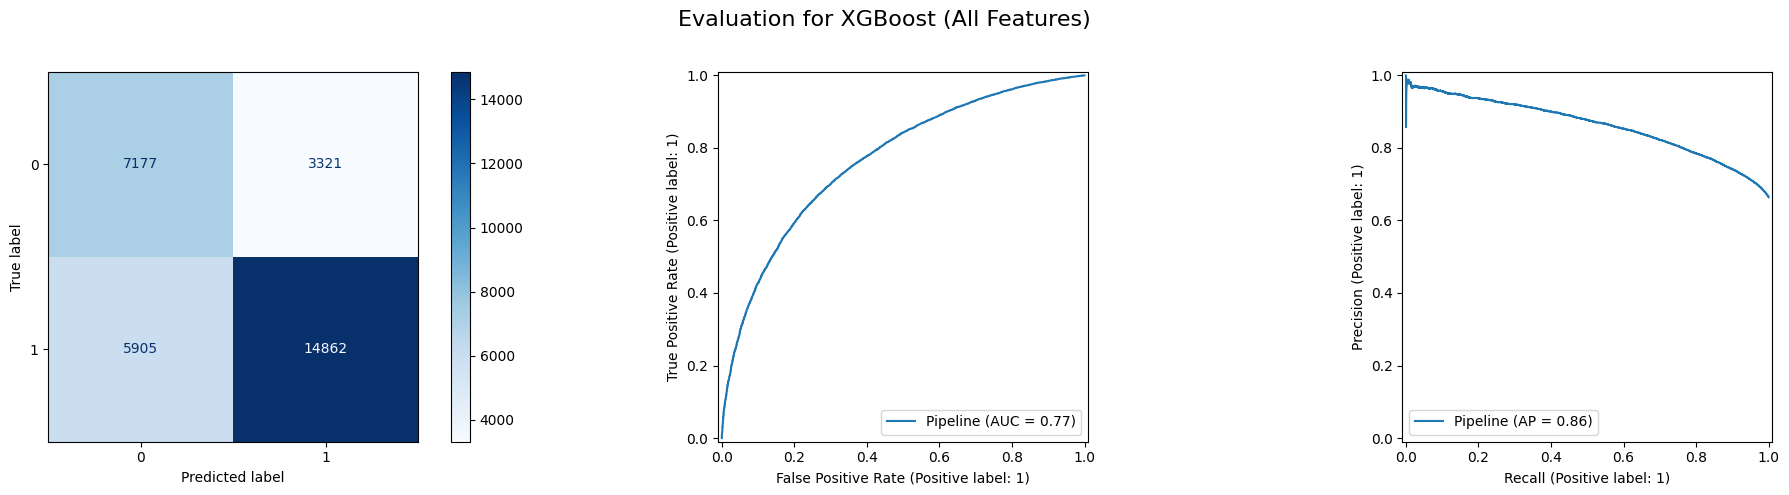


--- SHAP Analysis for XGBoost (All Features) ---


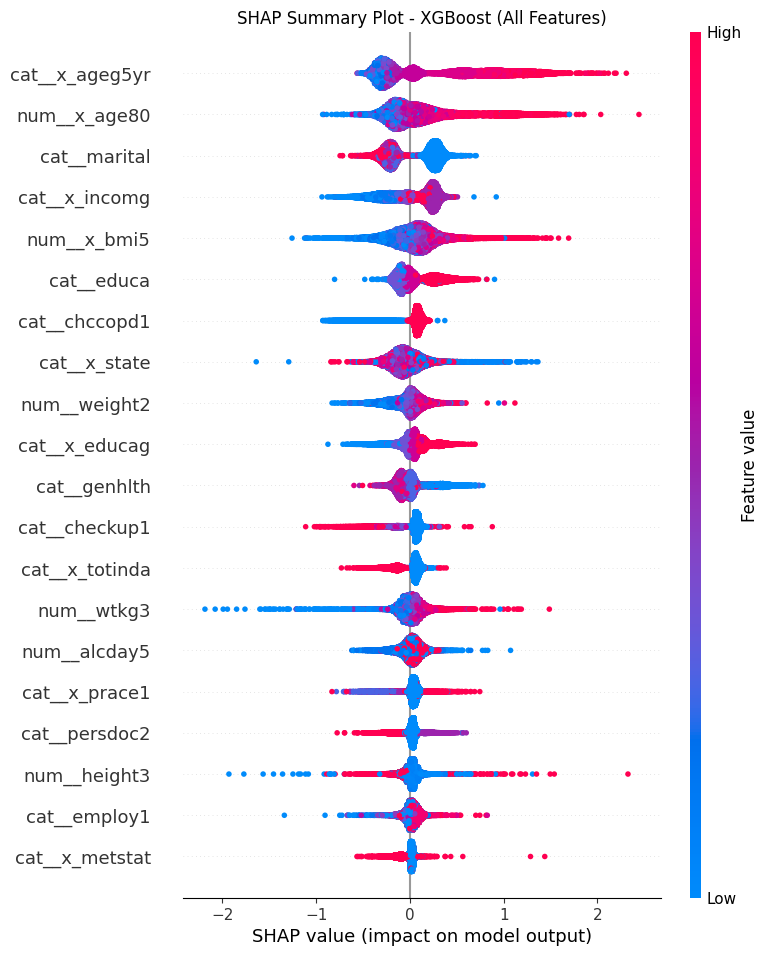


===== Training model: LightGBM (All Features) =====
[LightGBM] [Info] Number of positive: 83068, number of negative: 41990
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.038596 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1321
[LightGBM] [Info] Number of data points in the train set: 125058, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.627815 -> initscore=0.522855
[LightGBM] [Info] Start training from score 0.522855
Training completed in 3.83 seconds.
Accuracy: 0.7049 | F1-Score: 0.7121 | AUC: 0.7796


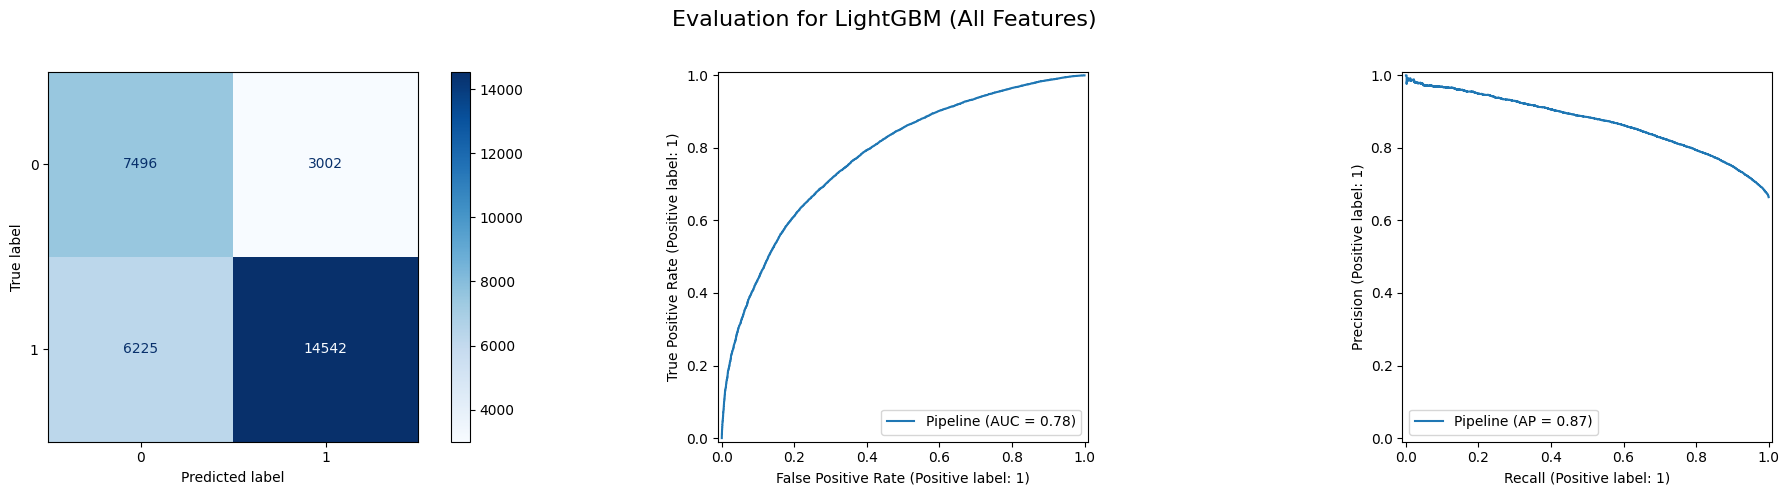


--- SHAP Analysis for LightGBM (All Features) ---


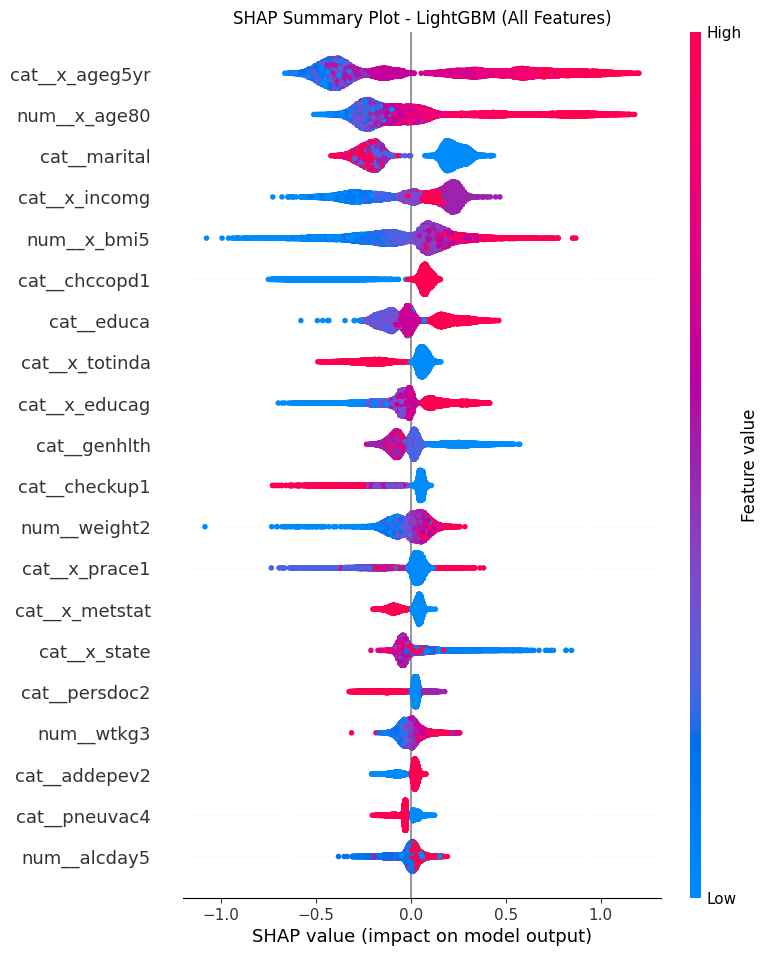


===== Training model: CatBoost (All Features) =====
Training completed in 45.45 seconds.
Accuracy: 0.7127 | F1-Score: 0.7189 | AUC: 0.7798


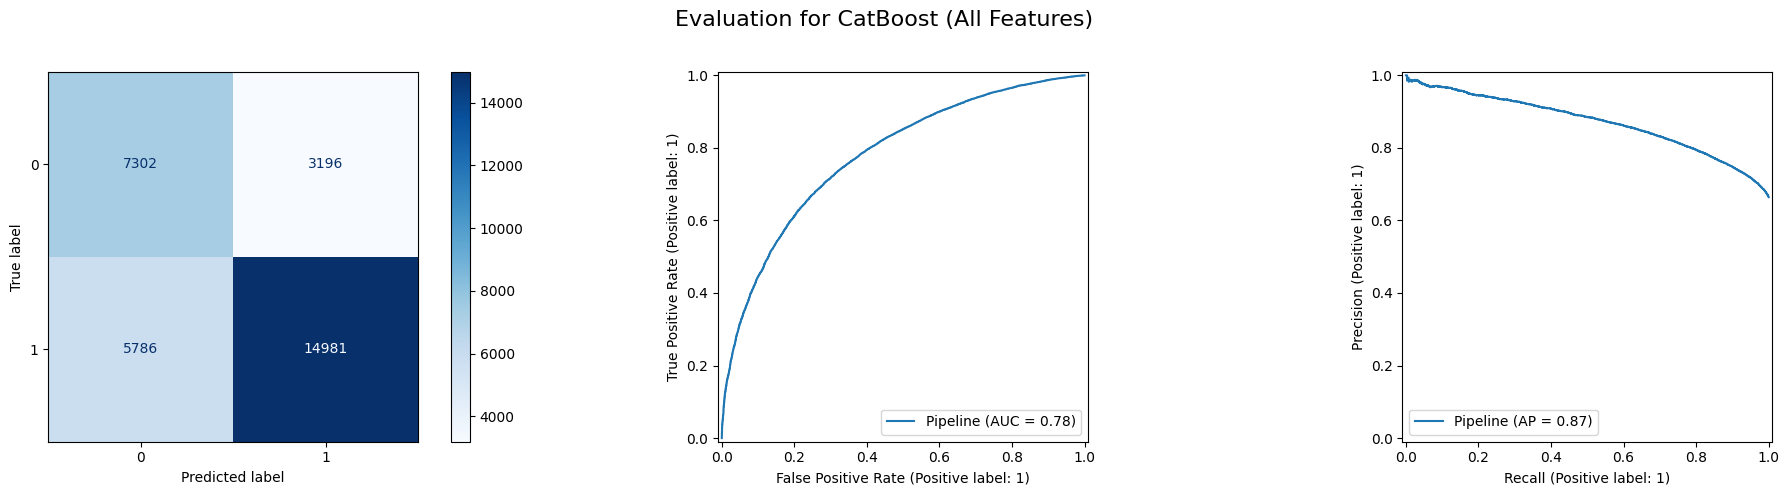


--- SHAP Analysis for CatBoost (All Features) ---


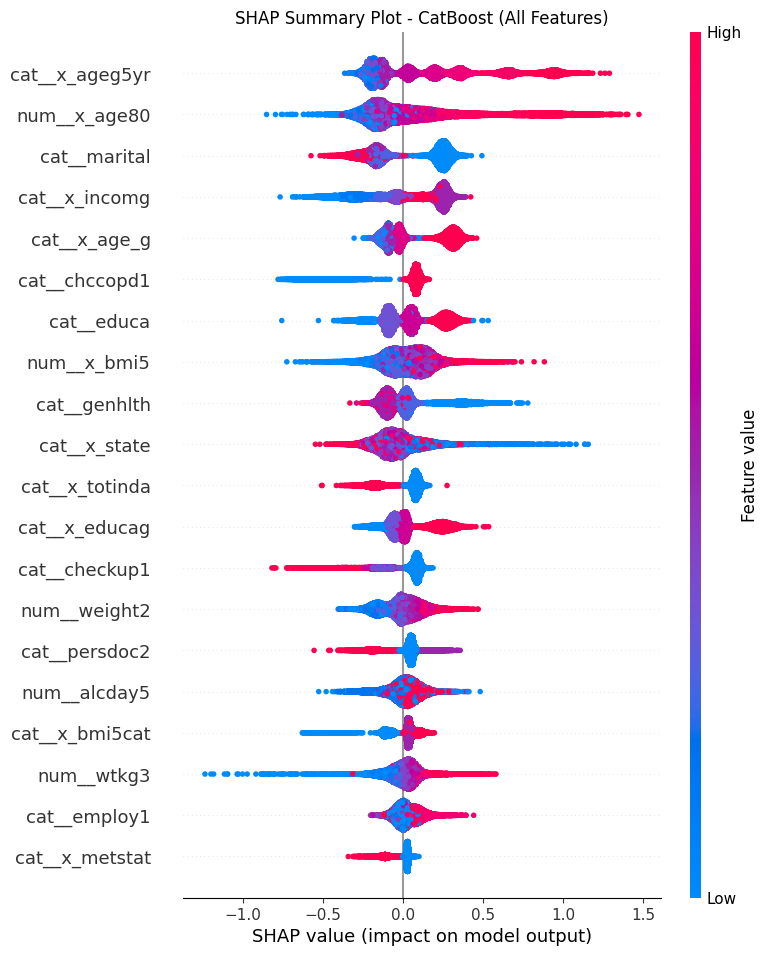


===== Training model: Logistic Regression (All Features) =====
Training completed in 27.28 seconds.
Accuracy: 0.7167 | F1-Score: 0.6929 | AUC: 0.7525


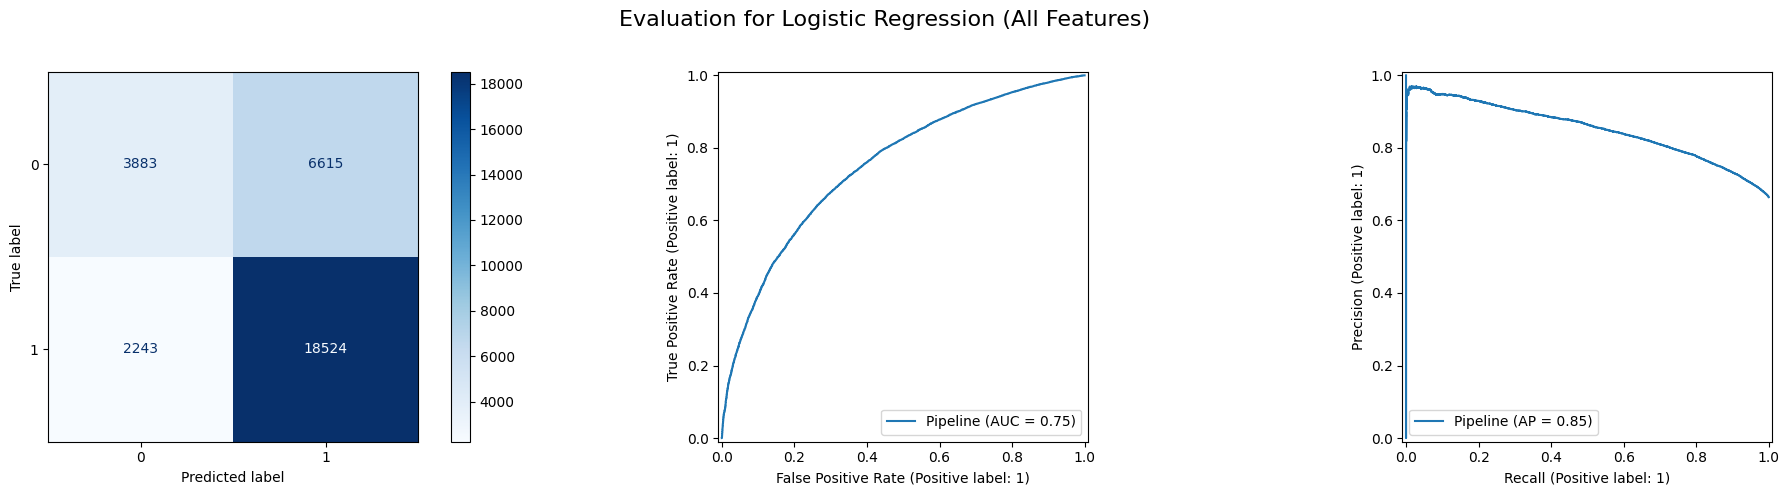


--- Coefficient Analysis ---
           Feature  Coefficient  Odds_Ratio
0     num__x_age80     0.812582    2.253720
39   cat__chccopd1     0.569757    1.767838
13    cat__x_age_g    -0.545608    0.579489
36   cat__cvdcrhd4    -0.295252    0.744344
18   cat__exerany2    -0.276330    0.758562
41   cat__addepev2     0.274694    1.316127
37   cat__cvdstrk3     0.258161    1.294547
45   cat__pneuvac4    -0.235790    0.789947
25   cat__x_educag     0.211426    1.235439
29  cat__x_metstat    -0.191583    0.825651
11  cat__x_bmi5cat     0.187897    1.206709
12    cat__genhlth    -0.166146    0.846922
47  cat__x_ageg5yr     0.140661    1.151034
42   cat__chckdny1    -0.138501    0.870663
27    cat__marital    -0.114471    0.891838
34   cat__checkup1    -0.108799    0.896910
44   cat__diffwalk     0.105008    1.110719
38    cat__asthma3    -0.103585    0.901599
3       num__wtkg3     0.095663    1.100389
35   cat__cvdinfr4     0.074415    1.077254
26      cat__educa     0.074231    1.077056
43

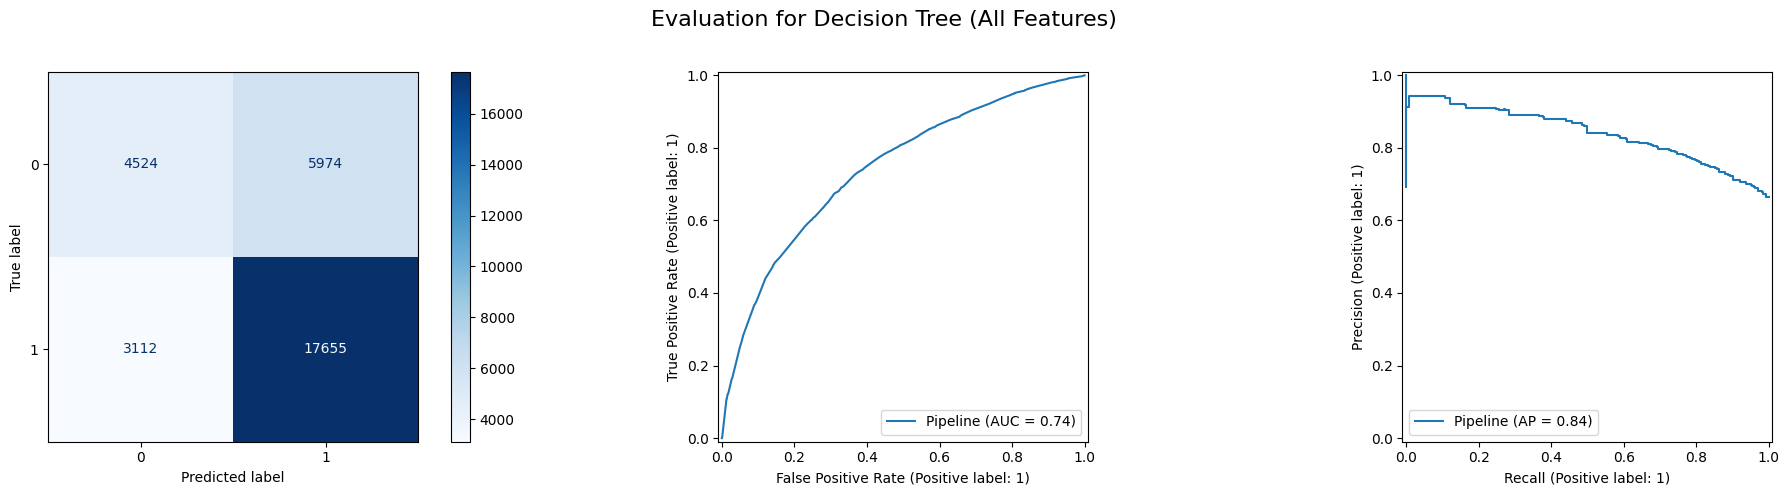


--- Decision Tree Analysis ---


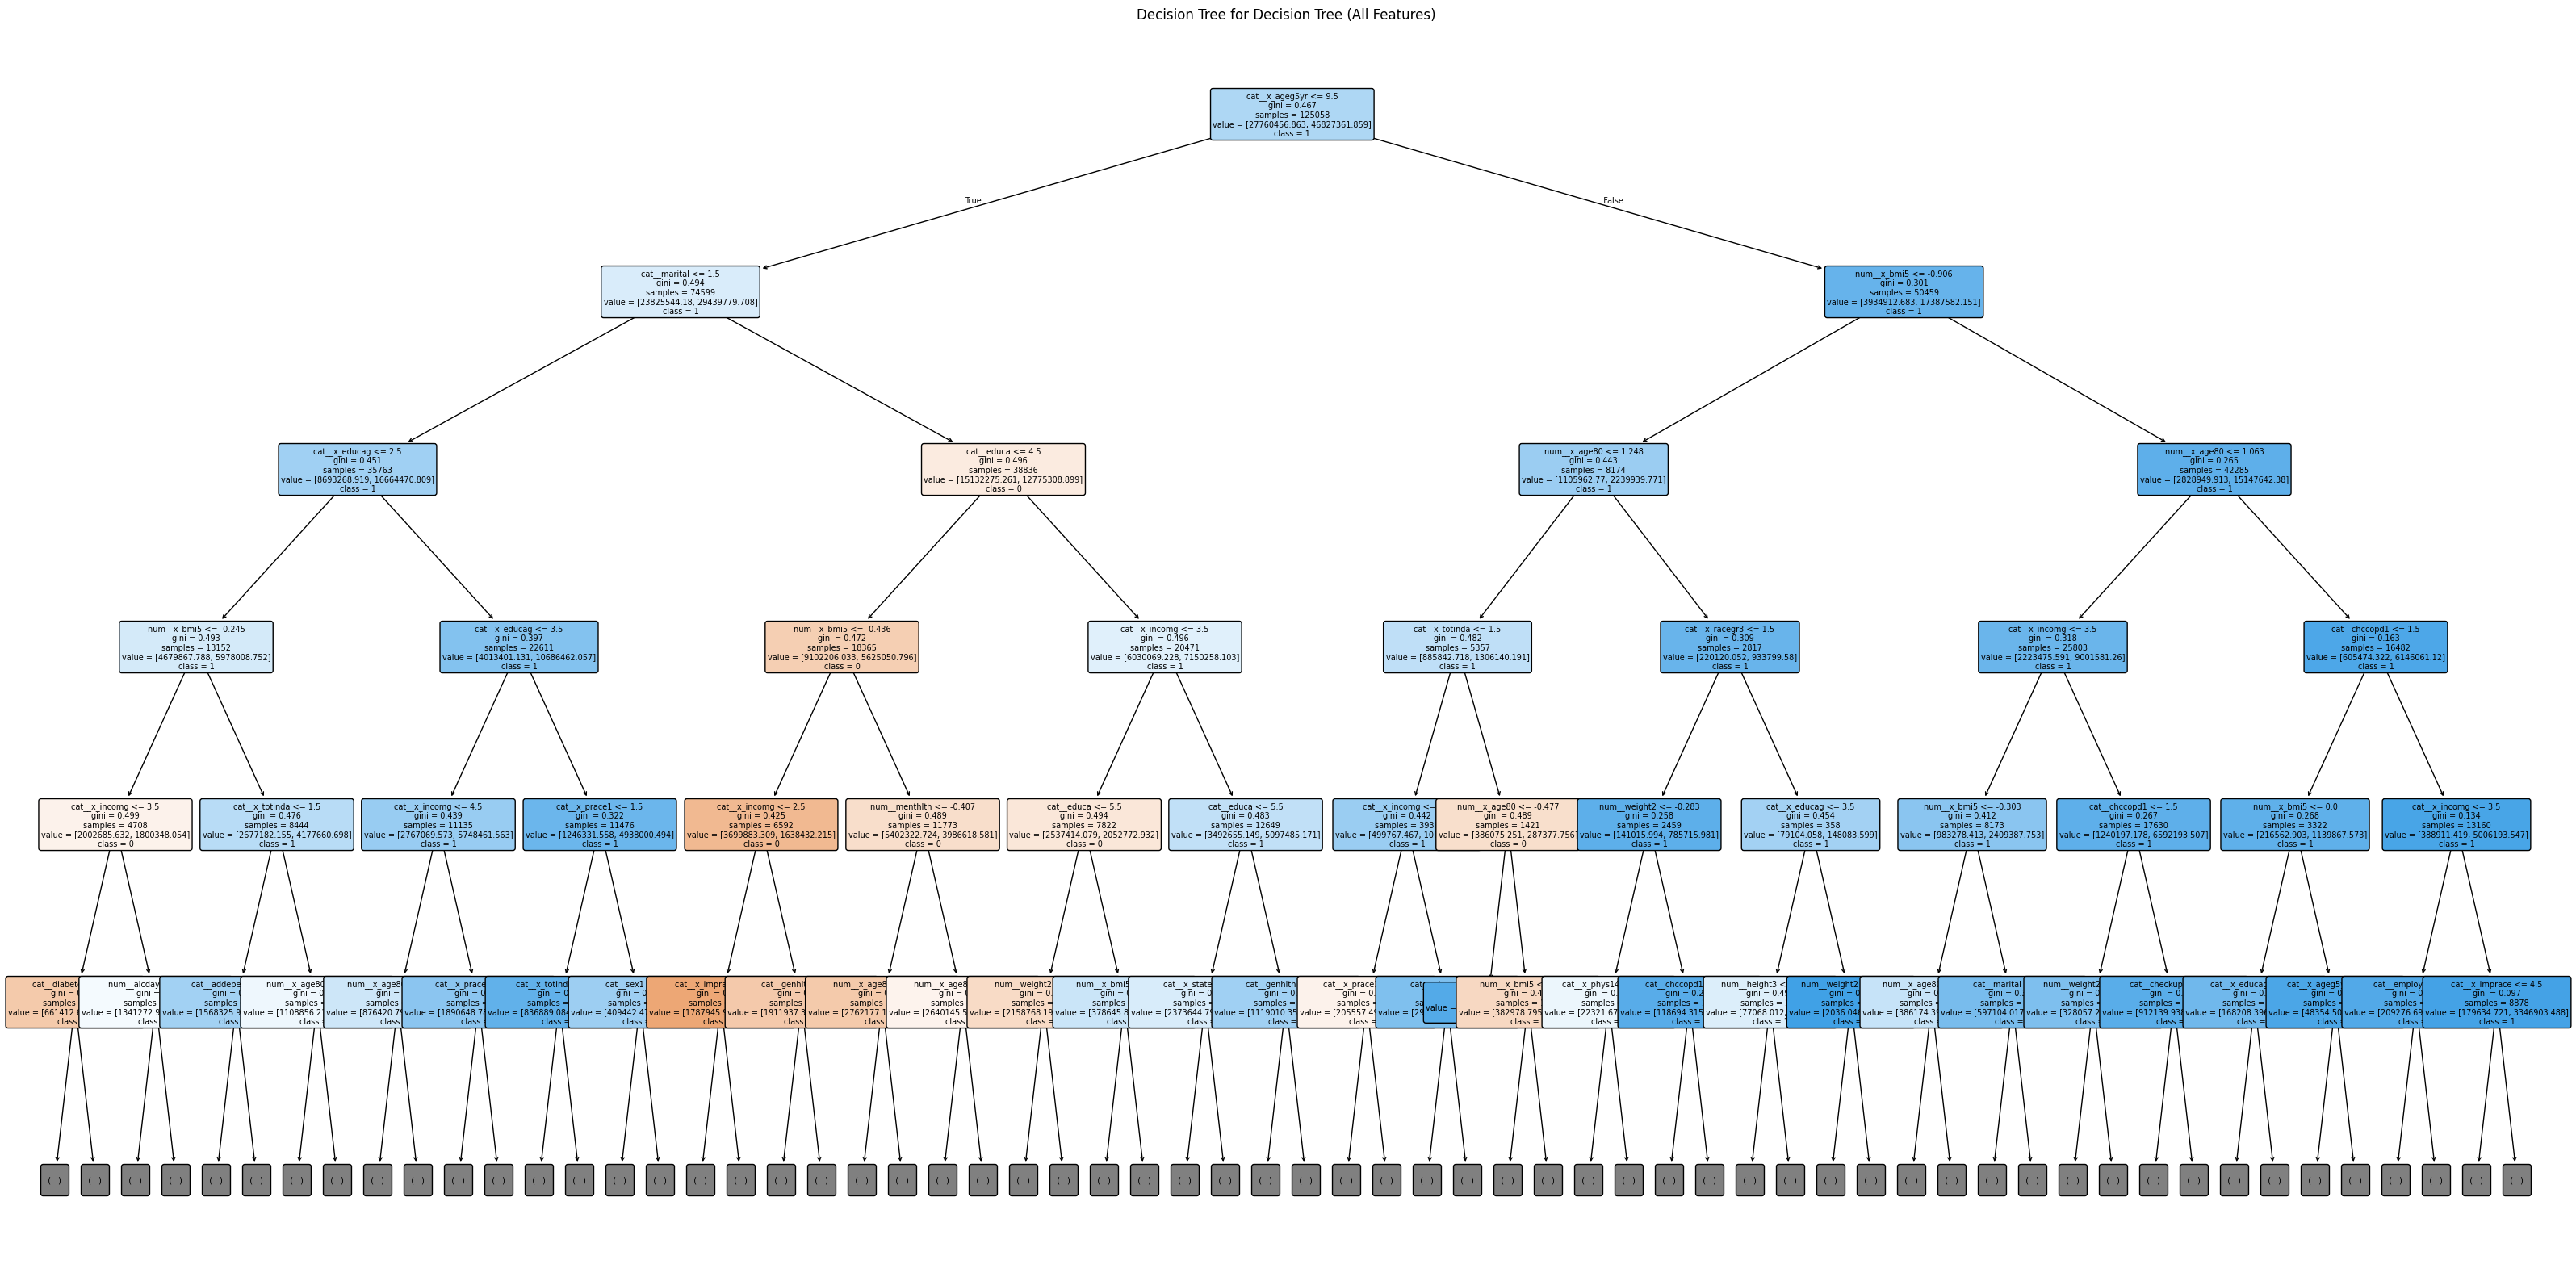

Tree Rules (first few levels):
 |--- cat__x_ageg5yr <= 9.50
|   |--- cat__marital <= 1.50
|   |   |--- cat__x_educag <= 2.50
|   |   |   |--- num__x_bmi5 <= -0.24
|   |   |   |   |--- cat__x_incomg <= 3.50
|   |   |   |   |   |--- cat__diabete3 <= 2.50
|   |   |   |   |   |   |--- cat__havarth3 <= 1.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- cat__havarth3 >  1.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- cat__diabete3 >  2.50
|   |   |   |   |   |   |--- num__alcday5 <= -1.14
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- num__alcday5 >  -1.14
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- cat__x_incomg >  3.50
|   |   |   |   |   |--- num__alcday5 <= -0.83
|   |   |   |   |   |   |--- cat__x_state <= 12.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- cat__x_state >  12.50

===== Training model: LDA (All Features) =====
Model is LDA, fitting without sample_weight.
T

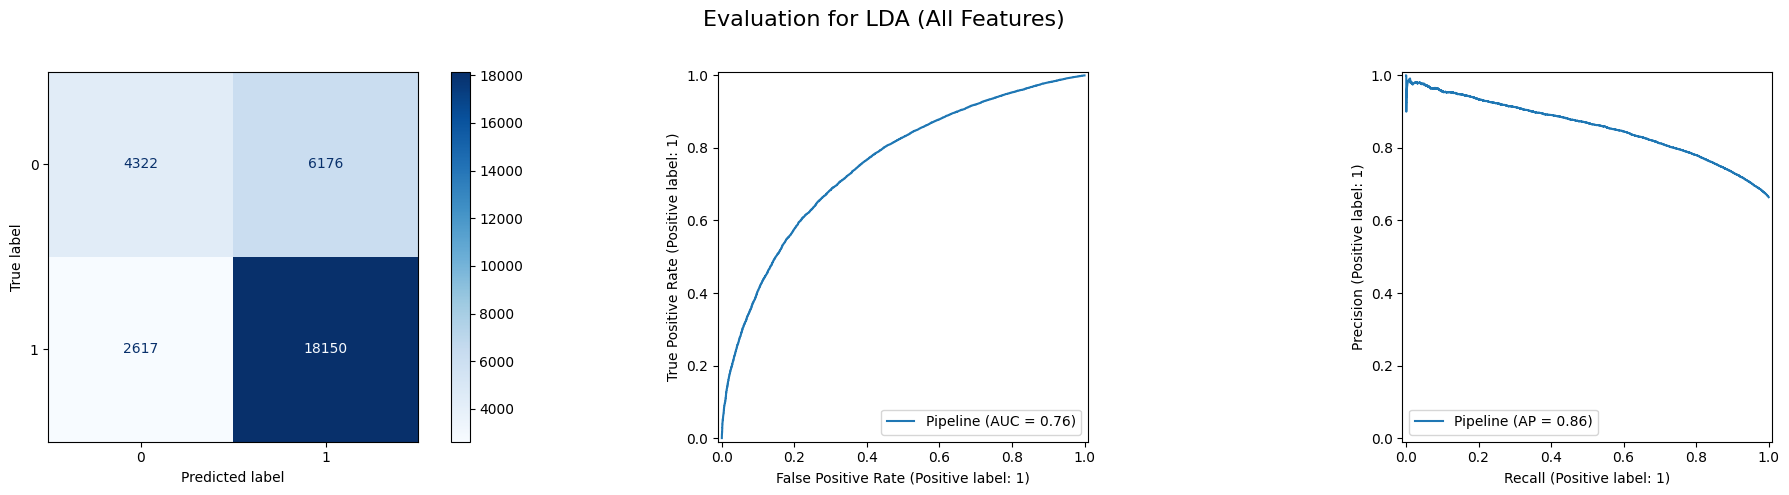


--- Coefficient Analysis ---
           Feature  Coefficient
0     num__x_age80     1.087001
39   cat__chccopd1     0.645286
13    cat__x_age_g    -0.497905
18   cat__exerany2    -0.332594
41   cat__addepev2     0.285598
36   cat__cvdcrhd4    -0.256930
42   cat__chckdny1    -0.241224
38    cat__asthma3    -0.211418
26      cat__educa     0.192087
12    cat__genhlth    -0.186493
45   cat__pneuvac4    -0.186170
34   cat__checkup1    -0.147752
44   cat__diffwalk     0.145879
1      num__x_bmi5     0.131694
27    cat__marital    -0.124214
11  cat__x_bmi5cat     0.122087
35   cat__cvdinfr4     0.119263
37   cat__cvdstrk3     0.114924
25   cat__x_educag     0.113693
3       num__wtkg3     0.094984
33   cat__persdoc2    -0.094954
29  cat__x_metstat    -0.093950
47  cat__x_ageg5yr     0.074373
30  cat__x_urbstat    -0.071950
28   cat__x_incomg     0.068735
17  cat__x_totinda    -0.056882
43   cat__diabete3    -0.051603
21       cat__sex1    -0.047664
4     num__height3     0.038125
16  cat__x

In [33]:
# all features
print("\nAnalysis with All Features")
for name, model_constructor in models_to_run_full_suite.items():
    result = run_full_analysis(f"{name} (All Features)", model_constructor, preprocessor, X, y, weights)
    all_features_results.append(result)


In [34]:
# Compare results
print("\nFinal Comparison Table")
vif_df = pd.DataFrame(vif_results)
all_df = pd.DataFrame(all_features_results)
final_results = pd.concat([vif_df, all_df]).set_index('Model')
print(final_results.sort_values(by='AUC', ascending=False))



Final Comparison Table
                                    Accuracy  F1-Score       AUC   Time (s)
Model                                                                      
CatBoost (All Features)             0.712714  0.718934  0.779762  45.450966
LightGBM (All Features)             0.704878  0.712101  0.779612   3.829342
XGBoost (All Features)              0.704910  0.711290  0.768524   4.282315
LightGBM (VIF)                      0.687254  0.695367  0.762362   2.353874
CatBoost (VIF)                      0.693363  0.700637  0.760777  39.697583
LDA (All Features)                  0.718759  0.701156  0.757220   1.179268
Logistic Regression (All Features)  0.716680  0.692916  0.752533  27.275194
XGBoost (VIF)                       0.688342  0.695321  0.749094   3.231730
Decision Tree (All Features)        0.709387  0.695822  0.741701   1.403267
Decision Tree (VIF)                 0.708652  0.692310  0.733532   0.767448
LDA (VIF)                           0.700336  0.673945  0.726782

### PCA

چه کاری انجام می‌دهد؟ PCA ویژگی‌های اولیه شما را به مجموعه‌ای جدید از ویژگی‌های ناهمبسته تبدیل می‌کند و همزمان می‌تواند ابعاد داده را کاهش دهد.

کِی باید استفاده کرد؟ زمانی که قصد دارید از مدل‌های حساس به هم‌خطی (مانند رگرسیون لجستیک) استفاده کنید و رفع هم‌خطی برای شما یک اولویت است.

ویژگی‌های جدید (مؤلفه‌های اصلی) دیگر به راحتی قابل تفسیر نیستند.

یک عیب PCA این است که مؤلفه‌های اصلی جدید، ترکیبی خطی از ویژگی‌های اولیه هستند و دیگر به راحتی قابل تفسیر نیستند. برای مثال، PC1 ممکن است چیزی شبیه به (0.4 * سن) - (0.6 * BMI) + (0.7 * درآمد) باشد. بنابراین، اگر هدف اصلی شما تفسیر ضرایب تک تک ویژگی‌های اولیه باشد، PCA بهترین انتخاب نیست.

In [35]:
pca_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_vif),
    ('pca', PCA(n_components=0.95)),  # n_components: تعداد مؤلفه‌ها
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])


X_train, X_test, y_train, y_test, weights_train, weights_test = train_test_split(
    X_vif, y, weights, test_size=0.2, random_state=42, stratify=y
)

# ۴. آموزش پایپ‌لاین با استفاده از وزن‌ها (sample_weight)
print("\nآموزش پایپ‌لاین PCA + Logistic Regression با وزن‌های نمونه...")
pca_pipeline.fit(X_train, y_train, classifier__sample_weight=weights_train)
print("آموزش کامل شد.")

# ۵. بررسی نتایج PCA
# می‌توانیم ببینیم PCA چند مؤلفه را انتخاب کرده است
num_components = pca_pipeline.named_steps['pca'].n_components_
print(f"\nتعداد مؤلفه‌های اصلی انتخاب شده توسط PCA (برای حفظ ۹۵٪ واریانس): {num_components}")

# ۶. ارزیابی مدل نهایی
y_pred_pca_lr = pca_pipeline.predict(X_test)

print("\n--- نتایج مدل Logistic Regression پس از PCA ---")
print(f"دقت (Accuracy): {accuracy_score(y_test, y_pred_pca_lr):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_pca_lr))
